In [1]:
from ROOT import TEfficiency, TFile, TDirectory, TCanvas, gStyle, TGraphAsymmErrors, TLegend, EColor, TMarker
import glob
from PIL import Image
import ROOT
# from drawTools import *

Welcome to JupyROOT 6.26/00


In [2]:
x =  ( 0.5, 1., 1.5, 2., 2.1, 2.2, 2.3, 2.4, 2.5, 2.7, 2.8, 2.9, 3., 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4., 4.5, 5., 5.5, 6., 6.5, 7.)
x =  (-2.4, -2.1, -1.8, -1.5, -1., 0, 1, 1.5, 1.8, 2.1, 2.4)
#vcol = (EColor.kRed-9, EColor.kRed-4, EColor.kRed, EColor.kRed+2, EColor.kYellow -3, EColor.kYellow, EColor.kGreen, EColor.kGreen+1, EColor.kGreen+2, EColor.kAzure-4, EColor.kAzure+1, EColor.kAzure, EColor.kMagenta, EColor.kMagenta +1)
vcol = (EColor.kRed-9, EColor.kRed-4, EColor.kRed, EColor.kRed+2, EColor.kYellow -3, EColor.kYellow, EColor.kGreen, EColor.kGreen+1, EColor.kGreen+2, EColor.kAzure-4, EColor.kAzure+1, EColor.kAzure, EColor.kMagenta, EColor.kMagenta +1)
def getCol(i, j =2) :
    return vcol[i]
def getcolor(i, j =2) :
    return  99 - (i * 2)
def getcolorOne(i, j) :
    if ( i != j ) :
        return 17
    else :
        return 99 - ( i *2)

In [3]:
canv = TCanvas("c1", "" ,700, 600);
canv.SetGrid()
canv_tmp = TCanvas("ctmp", "" ,700, 600);

In [4]:
gStyle.SetEndErrorSize(0)
range_up = 1.0
range_do = 0.0
marker_size = 1.2
marker_style = 20
marker_style2 = 22

In [5]:
canv.cd();
canv.SetLogy(False)
def DrawTrigPTSeq(trigDir, canv,  _leg = 0, _header = "", _pallet = getCol, _paux = 0) :
    canv.Clear();
    canv.SetGrid()
    canv.cd();
    # leg = TLegend(0.5, 0.2, 0.8, 0.45)
    _leg.SetBorderSize(0)
    _leg.SetNColumns(3)
    _leg.SetHeader( _header )
    first = True;
    ptmp = TGraphAsymmErrors()
    for i in reversed(range(len(x))):
        hist = trigDir.Get('pt_%dp%d' % (int(x[i]), int(10 *(x[i] - int(x[i]) ))))
        canv_tmp.cd()
        hist.Draw("AP")
        canv_tmp.Update()
        if( (hist.IsA()).GetName() == "TEfficiency") :
            hist = hist.GetPaintedGraph()
        canv.cd()
        hist.SetLineColor( _pallet(i, _paux) )
        hist.SetMarkerColor( _pallet(i, _paux) )
        hist.SetMarkerSize(marker_size)
        if( (i % 2) == 0) :
            hist.SetMarkerStyle(marker_style)
        if( (i % 2) == 1) :
            hist.SetMarkerStyle(marker_style2)
        hist.GetYaxis().SetRangeUser(range_do,range_up)
        hist.GetYaxis().SetNdivisions(int((range_up ) *10))
        hist.GetXaxis().SetRangeUser(0,50)
        hist.GetXaxis().SetNdivisions(25)
        hist.GetXaxis().SetTitle("p_{T} (GeV/c)")
        hist.GetYaxis().SetTitle("Efficiency")
        hist.Draw( "APL " if first else "PL ")
        if(_paux == i) :
            ptmp = hist
        leg.AddEntry(hist, "pt > %.1f" % x[i])
        first = False
    ptmp.Draw("PL")
    leg.DrawClone()
    canv.Draw()
    return canv, leg

def DrawTrigOne(trigDir, obj, canv, _and = False, _col = 221) :
    if not ( _and ) :
        canv.Clear();
    first = True;
    hist = trigDir.Get(obj)
#    canv_tmp.cd()
#    hist.Draw()
#    canv_tmp.Update()
    if( (hist.IsA()).GetName() == "TEfficiency") :
        canv_tmp.cd()
        hist.Draw()
        canv_tmp.Update()
        hist = hist.GetPaintedGraph()
    canv.cd()
    canv.Draw()
    col = _col
    if( _and ) : col = col-1
    hist.SetLineColor(col)
    hist.SetMarkerColor(col)
    hist.SetMarkerSize(marker_size)
    hist.SetMarkerStyle(marker_style)
    hist.GetYaxis().SetRangeUser(range_do,range_up)
    hist.GetYaxis().SetNdivisions(int((range_up - range_do) *10))
    hist.GetXaxis().SetRangeUser(0,50)
    hist.GetXaxis().SetNdivisions(25)
    hist.GetXaxis().SetTitle("p_{T} (GeV/c)")
    hist.GetYaxis().SetTitle("Efficiency")
    if( _and ) :
        print("and")
        hist.Draw( "PE" )
    else : 
        hist.Draw( "APE" )
    
    canv.Draw()
    return canv

def DrawTrigSeq(trigDir, obj, canv, _and = False, _col = 221, _leg = 0, _marker = 1, _disc = "", _pltmode = "", _rangeDo= 0, _rangeUp = 50) :
    if not ( _and ) :
        canv.Clear();
    first = True;
    hist = trigDir.Get(obj)
    if( (hist.IsA()).GetName() == "TEfficiency") :
        canv_tmp.cd()
        hist.Draw()
        canv_tmp.Update()
        hist = hist.GetPaintedGraph()
    canv.cd()
    canv.Draw()
    col = _col
    if( _and ) : col = col-1
    hist.SetLineColor(col)
    hist.SetMarkerColor(col)
    hist.SetMarkerSize(marker_size)
    hist.SetMarkerStyle(_marker)
    hist.GetYaxis().SetRangeUser(range_do,range_up)
    hist.GetYaxis().SetNdivisions(int((range_up)*10))
    hist.GetXaxis().SetRangeUser(_rangeDo, _rangeUp)
    hist.GetXaxis().SetNdivisions(20)
    hist.GetXaxis().SetTitle("p_{T} (GeV/c)")
    if( _pltmode == 'Y' ):
        hist.GetXaxis().SetRangeUser(-2.4, 2.4)
        hist.GetXaxis().SetNdivisions(8)
        hist.GetXaxis().SetTitle("Rapidity/#eta")
    if( _pltmode == 'C' ):
        hist.GetXaxis().SetRangeUser(0, 200)
        hist.GetXaxis().SetNdivisions(20)
        hist.GetXaxis().SetTitle("Centrality (x2)")
    if( _pltmode == 'PH' ):
        hist.GetXaxis().SetRangeUser(-3.5, 3.5)
        hist.GetXaxis().SetNdivisions(14)
        hist.GetXaxis().SetTitle("#phi")

    
    hist.GetYaxis().SetTitle("Efficiency")

    if( _leg != 0 ) :
        leg.AddEntry(hist, _disc)
    if( _and ) :
        hist.Draw( "PEL" )
    else : 
        hist.Draw( "APEL" )

    canv.Draw()
    if ( _leg == 0) :
        return canv, 0
    else :
        return canv, leg

In [153]:
# f_out = TFile.Open("output_Data2018_newMenu.root")
# f_out = TFile.Open("output_Data2018_newMenudRCut0p3.root")
# f_out1 = TFile.Open("output_Data2018_v2_6.root")
f_out2 = TFile
ver1 = "";pltdir = "";ver = ""
def setFile_leg( f_out2, ver1, pltdir, ver ):

     # f_out2 = TFile.Open("output_CMSSW132_pTHat2_JpsiEMB_trig_v5_4_6_dPt_Off_v4.root")
     f_out2 = TFile.Open("output_CMSSW1323_JpsiHY_yesTightdRdPt_looserL1drANDL3Nhit.root")
     # f_out2 = TFile.Open("output_CMSSW132_FilterMinN0_pTHat15_SiMuEMB_v1_0_GenMatched_hltMassCut_dPt_Off_v1_iter1_part1.root")
     ver1 = "v0_1"
     pltdir = "Eff_%s" % ver1
     ver = "JpsiHighPt_Gen_acc_" + ver1
    
def setFile( ):
    ###########-v0_1-######################################
    ver1 = "v0_1"

    # f_out2 = TFile.Open("output_CMSSW132_pTHat2_JpsiEMB_trig_v5_4_6_dPt_Off_v4.root")
    f_out2 = TFile.Open("output_CMSSW1323_JpsiHY_yesTightdRdPt_looserL1drANDL3Nhit.root")
    # f_out2 = TFile.Open("output_CMSSW132_FilterMinN0_pTHat15_SiMuEMB_v1_0_GenMatched_hltMassCut_dPt_Off_v1_iter1_part1.root")
    pltdir = "Eff_%s" % ver1
    ver = "JpsiEMB_Gen_acc_" + ver1
    
    print("set done")
    return f_out2, ver1, pltdir, ver
    
f_out2, ver1, pltdir, ver = setFile( )
# f_out3 = TFile.Open("output_CMSSW132_FilterMinN0_pTHat2_JpsiEMB_v1_0_GenMatched_hltMassCut_dPt_Off_v1_iter2newParams_part1.root")
f_out3 = TFile.Open("output_CMSSW132_pTHat2_JpsiEMB_trig_v29_dPt_Off_v3.root")

set done


In [35]:
def getGif( trig, version = ver1 ) :
    frames = []
    imgs = glob.glob("Eff_%s/Spktrm/%s/*.png" % (version, trig))
    for i in imgs:
        new_frame = Image.open(i)
        frames.append(new_frame)

    # Save into a GIF file that loops forever
    frames[0].save('Eff_%s/Spktrm_%s.gif' % (version, trig), format='GIF',
                   append_images=frames[1:],
                   save_all=True,
                   duration=len(frames)*15, loop=0)

In [36]:
# f_leg = TFile.Open("output_Data2018_LegacydR0p3.root")

In [37]:
leg = TLegend(0.15,0.12,0.45,0.35)
leg.SetBorderSize(0)

In [154]:
fkey = f_out2.GetListOfKeys()
fkey.Print()

Collection name='THashList', class='THashList', size=29
 TKey Name = HLT_HIL1SingleMu0_Open_v, Title = HLT_HIL1SingleMu0_Open_v, Cycle = 1
 TKey Name = HLT_HIL1SingleMu0_Cosmic_v, Title = HLT_HIL1SingleMu0_Cosmic_v, Cycle = 1
 TKey Name = HLT_HIL1SingleMu0_v, Title = HLT_HIL1SingleMu0_v, Cycle = 1
 TKey Name = HLT_HIL1SingleMu3_v, Title = HLT_HIL1SingleMu3_v, Cycle = 1
 TKey Name = HLT_HIL1SingleMu5_v, Title = HLT_HIL1SingleMu5_v, Cycle = 1
 TKey Name = HLT_HIL1SingleMu7_v, Title = HLT_HIL1SingleMu7_v, Cycle = 1
 TKey Name = HLT_HIL2SingleMu3_Open_v, Title = HLT_HIL2SingleMu3_Open_v, Cycle = 1
 TKey Name = HLT_HIL2SingleMu5_Open_v, Title = HLT_HIL2SingleMu5_Open_v, Cycle = 1
 TKey Name = HLT_HIL2SingleMu7_Open_v, Title = HLT_HIL2SingleMu7_Open_v, Cycle = 1
 TKey Name = HLT_HIL3SingleMu3_Open_v, Title = HLT_HIL3SingleMu3_Open_v, Cycle = 1
 TKey Name = HLT_HIL3SingleMu5_Open_v, Title = HLT_HIL3SingleMu5_Open_v, Cycle = 1
 TKey Name = HLT_HIL3SingleMu7_Open_v, Title = HLT_HIL3SingleMu7_Op

Info in <TCanvas::Print>: pdf file Eff_v0_1/Eff_pt_RateCut_Comp_L3Quarkonia_JpsiEMB_Gen_acc_v0_1.pdf has been created
Info in <TCanvas::Print>: png file Eff_v0_1/Eff_pt_RateCut_Comp_L3Quarkonia_JpsiEMB_Gen_acc_v0_1.png has been created


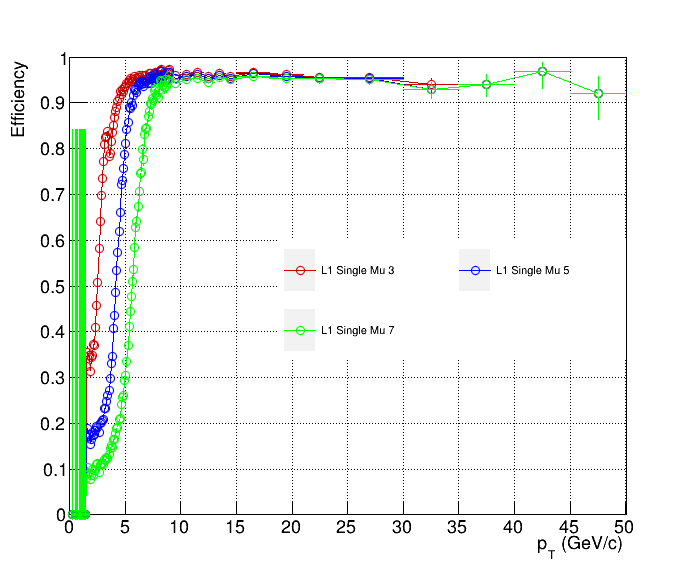

In [161]:
                                                                                                                                                                                                                                                                                                                                                                                    
leg.SetNColumns(2)
leg.SetTextSize(0.020)
#leg.SetX1(0.1);leg.SetX2(0.95);leg.SetY1(0.7);leg.SetY2(0.92);
leg.SetX1(0.4);leg.SetX2(0.90);leg.SetY1(0.37);leg.SetY2(0.58);

leg.Clear()

### Single Muon

canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL1SingleMu3_v"), 'pt', canv, _and = False, _col = EColor.kRed+1, _leg = leg, _marker = 24, _disc = "L1 Single Mu 3")# %s" % ver1)# v2-7-mod1")
canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL1SingleMu5_v"), 'pt', canv, _and = True, _col = EColor.kBlue+1, _leg = leg, _marker = 24, _disc = "L1 Single Mu 5")# %s" % ver1)# v2-7-mod1")
canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL1SingleMu7_v"), 'pt', canv, _and = True, _col = EColor.kGreen+1, _leg = leg, _marker = 24, _disc = "L1 Single Mu 7")# %s" % ver1)# v2-7-mod1")
# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL1SingleMu5_v"), 'pt', canv, _and = False, _col = EColor.kRed-1, _leg = leg, _marker = 24, _disc = "L1 Single Mu 3")# %s" % ver1)# v2-7-mod1")
# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL1SingleMu7_v"), 'pt', canv,  _rangeUp=20, _and = False, _col = EColor.kRed, _leg = leg, _marker = 24, _disc = "L1 Single Mu 7")# %s" % ver1)# v2-7-mod1")


# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL2SingleMu3_Open_v"), 'pt', canv, _and = True, _col = EColor.kOrange, _leg = leg, _marker = 24, _disc = "L2 Single Mu 3")# %s" % ver1)# v2-7-mod1")
# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL2SingleMu5_Open_v"), 'pt', canv, _and = True, _col = EColor.kOrange, _leg = leg, _marker = 24, _disc = "L2 Single Mu 3")# %s" % ver1)# v2-7-mod1")
# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL2SingleMu7_Open_v"), 'pt', canv, _and = True, _col = EColor.kOrange, _leg = leg, _marker = 24, _disc = "L2 Single Mu 7")# %s" % ver1)# v2-7-mod1")

# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL3SingleMu3_Open_v"), 'pt', canv, _and = True, _col = EColor.kAzure, _leg = leg, _marker = 24, _disc = "L3 Single Mu 3")# %s" % ver1)# v2-7-mod1")
# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL3SingleMu5_Open_v"), 'pt', canv, _and = True, _col = EColor.kAzure+2, _leg = leg, _marker = 24, _disc = "L3 Single Mu 5")# %s" % ver1)# v2-7-mod1")
# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL3SingleMu7_Open_v"), 'pt', canv, _and = True, _col = EColor.kAzure+4, _leg = leg, _marker = 24, _disc = "L3 Single Mu 7")# %s" % ver1)# v2-7-mod1")
# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL3SingleMu12_Open_v"), 'pt', canv, _and = True, _col = EColor.kAzure+6, _leg = leg, _marker = 24, _disc = "L3 Single Mu 12")# %s" % ver1)# v2-7-mod1")


### Dimuon

# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL1DoubleMu0_MaxDr3p5_Open_v"), 'pt', canv, _rangeUp=50, _and = False, _col = EColor.kRed+1, _leg = leg, _marker = 24, _disc = "L1DoubleMu Open Max DR")# %s" % ver1)# v2-7-mod1")
# # canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL1DoubleMu0_Zero_v"), 'pt', canv, _and = True, _col = EColor.kGreen+1, _leg = leg, _marker = 24, _disc = "L1DoubleMu Zero")# %s" % ver1)# v2-7-mod1")
# # canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL1DoubleMu0_SQ_v"), 'pt', canv, _and = True, _col = EColor.kTeal+1, _leg = leg, _marker = 24, _disc = "L1 DoubleMu SQ")# %s" % ver1)# v2-7-mod1")

# # canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL2DoubleMu0_Open_v"), 'pt', canv, _and = True, _col = EColor.kGreen+1, _leg = leg, _marker = 24, _disc = "L2DoubleMuOpen")# %s" % ver1)# v2-7-mod1")
# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL2DoubleMu0_M1p5to6_Open_v"), 'pt', canv, _rangeUp=10, _and = True, _col = EColor.kOrange+1, _leg = leg, _marker = 24, _disc = "L2DoubleMuOpen M. 1-6.5")# %s" % ver1)# v2-7-mod1")
# # canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL2DoubleMu2p8_M1to6p5_Open_v"), 'pt', canv, _and = True, _col = EColor.kGreen+1, _leg = leg, _marker = 24, _disc = "L2DbMu pt>2.8 M. 1-6.5")# %s" % ver1)# v2-7-mod1")
# # canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL3DoubleMu0_M2to4p5_Open_v"), 'pt', canv, _and = True, _col = EColor.kBlue+1, _leg = leg, _marker = 24, _disc = "L3DoubleMuOpen M. 2-4.5")# %s" % ver1)# v2-7-mod1")

# # canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL3DoubleMu0_M0toInf_Open_v"), 'pt', canv, _and = True, _col = EColor.kAzure+3, _leg = leg, _marker = 24, _disc = "L3DbMu")# %s" % ver1)# v2-7-mod1")
# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL3DoubleMu0_Quarkonia_Open_v"), 'pt', canv, _rangeUp=10, _and = True, _col = EColor.kMagenta+1, _leg = leg, _marker = 24, _disc = "L3DbMu Q")# %s" % ver1)# v2-7-mod1")
# # canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL3DoubleMuLikeMu12_Open_v"), 'pt', canv, _and = True, _col = EColor.kAzure+6, _leg = leg, _marker = 24, _disc = "L3 Single Mu 12")# %s" % ver1)# v2-7-mod1")

# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL3DoubleMu0_MuPt2p5_M7to15_Open_v"), 'pt', canv, _and = True, _col = EColor.kAzure+3, _leg = leg, _marker = 24, _disc = "L3DbMu pt>2 M. 2-4.5")# %s" % ver1)# v2-7-mod1")
# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL3DoubleMu0_M7to15_Open_v"), 'pt', canv, _and = True, _col = EColor.kAzure+3, _leg = leg, _marker = 24, _disc = "L3DbMu pt>2 M. 2-4.5")# %s" % ver1)# v2-7-mod1")

# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL3DoubleMu0_MuPt3_M7to15_Open_v"), 'pt', canv, _and = True, _col = EColor.kAzure+3, _leg = leg, _marker = 24, _disc = "L3DbMu pt>2 M. 2-4.5")# %s" % ver1)# v2-7-mod1")
# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL3DoubleMu0_OneMuPt3_M7to15_Open_v"), 'pt', canv, _and = True, _col = EColor.kAzure+3, _leg = leg, _marker = 24, _disc = "L3DbMu pt>2 M. 2-4.5")# %s" % ver1)# v2-7-mod1")

# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL3DoubleMu0_M0toInf_Open_v"), 'pt', canv, _and = True, _col = EColor.kBlue+1, _leg = leg, _marker = 24, _disc = "L3DoubleMuOpen")# %s" % ver1)# v2-7-mod1")



saveTag = "L3Quarkonia_"
leg.DrawClone()
canv.Draw()
canv.SaveAs("%s/Eff_pt_RateCut_Comp_%s%s.pdf" % (pltdir, saveTag, ver) )
canv.SaveAs("%s/Eff_pt_RateCut_Comp_%s%s.png" % (pltdir, saveTag, ver) )

leg.Clear()

Info in <TCanvas::Print>: pdf file Eff_v0_1/Eff_pt_RateCut_Comp_JpsiEMB_Gen_acc_v0_1.pdf has been created
Info in <TCanvas::Print>: png file Eff_v0_1/Eff_pt_RateCut_Comp_JpsiEMB_Gen_acc_v0_1.png has been created


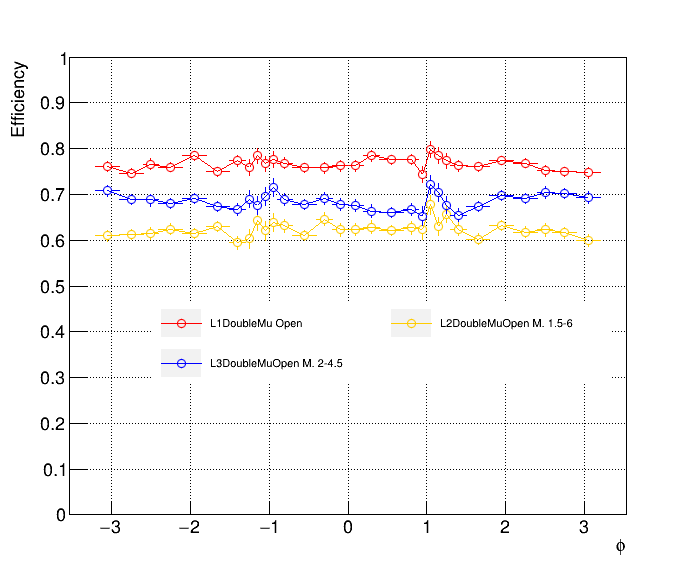

In [147]:
leg.SetNColumns(2)
leg.SetTextSize(0.020)
#leg.SetX1(0.1);leg.SetX2(0.95);leg.SetY1(0.7);leg.SetY2(0.92);
leg.SetX1(0.22);leg.SetX2(0.88);leg.SetY1(0.33);leg.SetY2(0.47);

leg.Clear()
# canv, leg = DrawTrigSeq(f_out1.Get("L1DoubleMuOpen"), 'pt', canv, _col = 221, _leg = leg, _disc = "L1DoubleMuOpen v2-6")
#canv, leg = DrawTrigSeq(f_out1.Get("L1DoubleMuZero"), 'pt', canv, _and = True, _col = 221, _leg = leg, _disc = "L1DoubleMuZero v2-6")
#canv, leg = DrawTrigSeq(f_out1.Get("L1DoubleMuSQ"), 'pt', canv, _and = True, _col = 208, _leg = leg, _disc = "L1DoubleMu SQ v2-6")

# canv, leg = DrawTrigSeq(f_out2.Get("L1DoubleMuOpen"), 'pt', canv, _and = False, _col = getcolor(0), _leg = leg, _marker = 24, _disc = "L1DoubleMuOpen")# %s" % ver1)# v2-7-mod1")
# canv, leg = DrawTrigSeq(f_out2.Get("L1DoubleMuCosmic"), 'pt', canv, _and = True, _col = getcolor(34), _leg = leg, _marker = 24, _disc = "L1DoubleMuCosmic")# %s" % ver1)# v2-7-mod1")

# canv, leg = DrawTrigSeq(f_out2.Get("L2DoubleMuOpen"), 'pt', canv, _and = True, _col = getcolor(1), _leg = leg, _marker = 24, _disc = "L2DoubleMuOpen")# %s" % ver1)# v2-7-mod1")
# canv, leg = DrawTrigSeq(f_out2.Get("L2DoubleMuCosmic"), 'pt', canv, _and = True, _col = getcolor(18), _leg = leg, _marker = 24, _disc = "L2DoubleMuCosmic")# %s" % ver1)# v2-7-mod1")

# canv, leg = DrawTrigSeq(f_out2.Get("L3DoubleMuOpen"), 'pt', canv, _and = True, _col = getcolor(3), _leg = leg, _marker = 24, _disc = "L3DoubleMuOpen")# %s" % ver1)# v2-7-mod1")
# canv, leg = DrawTrigSeq(f_out2.Get("L3DoubleMuCosmic"), 'pt', canv, _and = True, _col = getcolor(20), _leg = leg, _marker = 24, _disc = "L3DoubleMuCosmic")# %s" % ver1)# v2-7-mod1")

canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL1DoubleMu0_MaxDr3p5_Open_v"), 'phi', canv, _pltmode = "PH", _and = False, _col = EColor.kRed, _leg = leg, _marker = 24, _disc = "L1DoubleMu Open")# %s" % ver1)# v2-7-mod1")
# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL1DoubleMu0_Zero_v"), 'pt', canv, _and = True, _col = EColor.kGreen+1, _leg = leg, _marker = 24, _disc = "L1DoubleMu Zero")# %s" % ver1)# v2-7-mod1")
# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL1DoubleMu0_SQ_v"), 'pt', canv, _and = True, _col = EColor.kBlue+1, _leg = leg, _marker = 24, _disc = "L1 DoubleMu SQ")# %s" % ver1)# v2-7-mod1")

# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL2DoubleMu0_Open_v"), 'phi', canv, _pltmode = "PH", _and = True, _col = EColor.kGreen+1, _leg = leg, _marker = 24, _disc = "L2DoubleMuOpen")# %s" % ver1)# v2-7-mod1")
canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL2DoubleMu0_M1p5to6_Open_v"), 'phi', canv, _pltmode= "PH", _and = True, _col = EColor.kOrange+1, _leg = leg, _marker = 24, _disc = "L2DoubleMuOpen M. 1.5-6")# %s" % ver1)# v2-7-mod1")
# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL2DoubleMu2p8_M1to6p5_Open_v"), 'pt', canv, _and = True, _col = EColor.kPink+1, _leg = leg, _marker = 24, _disc = "L2DbMu pt>2.8 M. 1-6.5")# %s" % ver1)# v2-7-mod1")
canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL3DoubleMu0_Quarkonia_Open_v"), 'phi', canv, _pltmode = "PH", _and = True, _col = EColor.kBlue+1, _leg = leg, _marker = 24, _disc = "L3DoubleMuOpen M. 2-4.5")# %s" % ver1)# v2-7-mod1")
# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL3DoubleMu0_M0toInf_Open_v"), 'y', canv, _pltmode = "Y", _and = True, _col = EColor.kAzure+4, _leg = leg, _marker = 24, _disc = "L3DoubleMuOpen M. 0-999")# %s" % ver1)# v2-7-mod1")


# # canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL1SingleMu3_v"), 'phi', canv, _pltmode = "PH", _and = False, _col = EColor.kRed-2, _leg = leg, _marker = 24, _disc = "L1 Single Mu 3")# %s" % ver1)# v2-7-mod1")
# # canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL1SingleMu5_v"), 'phi', canv, _pltmode = "PH", _and = False, _col = EColor.kRed-1, _leg = leg, _marker = 24, _disc = "L1 Single Mu 3")# %s" % ver1)# v2-7-mod1")
# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL1SingleMu7_v"), 'phi', canv, _pltmode = "PH", _and = False, _col = EColor.kRed, _leg = leg, _marker = 24, _disc = "L1 Single Mu 3")# %s" % ver1)# v2-7-mod1")

# # canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL2SingleMu3_Open_v"), 'phi', canv, _pltmode = "PH", _and = True, _col = EColor.kOrange, _leg = leg, _marker = 24, _disc = "L2 Single Mu 3")# %s" % ver1)# v2-7-mod1")
# # canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL2SingleMu5_Open_v"), 'phi', canv, _pltmode = "PH", _and = True, _col = EColor.kOrange, _leg = leg, _marker = 24, _disc = "L2 Single Mu 3")# %s" % ver1)# v2-7-mod1")
# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL2SingleMu7_Open_v"), 'phi', canv, _and = True, _col = EColor.kOrange, _leg = leg, _marker = 24, _disc = "L2 Single Mu 3")# %s" % ver1)# v2-7-mod1")

# # canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL3SingleMu3_Open_v"), 'phi', canv, _pltmode = "PH", _and = True, _col = EColor.kAzure, _leg = leg, _marker = 24, _disc = "L3 Single Mu 3")# %s" % ver1)# v2-7-mod1")
# # canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL3SingleMu5_Open_v"), 'phi', canv, _pltmode = "PH", _and = True, _col = EColor.kAzure+2, _leg = leg, _marker = 24, _disc = "L3 Single Mu 5")# %s" % ver1)# v2-7-mod1")
# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL3SingleMu7_Open_v"), 'phi', canv, _pltmode = "PH", _and = True, _col = EColor.kAzure+4, _leg = leg, _marker = 24, _disc = "L3 Single Mu 7")# %s" % ver1)# v2-7-mod1")
# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL3SingleMu12_Open_v"), 'phi', canv, _pltmode = "PH", _and = True, _col = EColor.kAzure+6, _leg = leg, _marker = 24, _disc = "L3 Single Mu 12")# %s" % ver1)# v2-7-mod1")



# canv, leg = DrawTrigSeq(f_out3.Get("HLT_HIL3DoubleMu0_M2to4p5_Open_v"), 'phi', canv, _pltmode = "PH", _and = True, _col = EColor.kBlue+1, _leg = leg, _marker = 24, _disc = "L3DoubleMuOpen M. 2-4.5 new Par")# %s" % ver1)# v2-7-mod1")

# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL3DoubleMu2_M2to4p5_Open_v"), 'pt', canv, _and = True, _col = EColor.kOrange+1, _leg = leg, _marker = 24, _disc = "L3DbMu pt>2 M. 2-4.5 old Par")# %s" % ver1)# v2-7-mod1")
# canv, leg = DrawTrigSeq(f_out3.Get("HLT_HIL3DoubleMu2_M2to4p5_Open_v"), 'pt', canv, _and = True, _col = EColor.kGreen+1, _leg = leg, _marker = 24, _disc = "L3DbMu pt>2 M. 2-4.5 new Par")# %s" % ver1)# v2-7-mod1")

# canv, leg = DrawTrigSeq(f_out2.Get("L3DoubleMuOpen2_M2to4p5"), 'pt', canv, _and = True, _col = EColor.kMagenta+1, _leg = leg, _marker = 24, _disc = "L3DoubleMuOpen2_M2to4p5")# %s" % ver1)# v2-7-mod1")
# canv, leg = DrawTrigSeq(f_out2.Get("L3DoubleMuOpen1p5_M2to4p5"), 'pt', canv, _and = True, _col = EColor.kBlue+2, _leg = leg, _marker = 24, _disc = "L3DoubleMuOpen1p5_M2to4p5")# %s" % ver1)# v2-7-mod1")
# canv, leg = DrawTrigSeq(f_out2.Get("L3DoubleMuOpen1_M2to4p5"), 'pt', canv, _and = True, _col = EColor.kBlue+3, _leg = leg, _marker = 24, _disc = "L3DoubleMuOpen1_M2to4p5")# %s" % ver1)# v2-7-mod1")
# canv, leg = DrawTrigSeq(f_out2.Get("L3DoubleMuOpen0p5_M2to4p5"), 'pt', canv, _and = True, _col = EColor.kBlue+5, _leg = leg, _marker = 24, _disc = "L3DoubleMuOpen0p5_M2to4p5")# %s" % ver1)# v2-7-mod1")
# canv, leg = DrawTrigSeq(f_out2.Get("L3DoubleMuOpen_M2to4p5"), 'pt', canv, _and = True, _col = EColor.kRed+3, _leg = leg, _marker = 24, _disc = "L3DoubleMuOpen_M2to4p5")# %s" % ver1)# v2-7-mod1")
# canv, leg = DrawTrigSeq(f_out2.Get("L3DoubleMuOpen_M7to15"), 'pt', canv, _and = True, _col = EColor.kTeal+1, _leg = leg, _marker = 24, _disc = "L3DoubleMuOpen_M7to15")# %s" % ver1)# v2-7-mod1")
# canv, leg = DrawTrigSeq(f_out2.Get("L3DoubleMuOpen_Quarkonia"), 'pt', canv, _and = True, _col = EColor.kRed+4, _leg = leg, _marker = 24, _disc = "L3DoubleMuOpen_Quarkonia")# %s" % ver1)# v2-7-mod1")
# canv, leg = DrawTrigSeq(f_out2.Get("L3DoubleMuOpen_Quarkonia_LowMpT2"), 'pt', canv, _and = True, _col = EColor.kBlue+5, _leg = leg, _marker = 24, _disc = "L3DoubleMuOpen_Quarkonia_LowMpT2")# %s" % ver1)# v2-7-mod1")
# canv, leg = DrawTrigSeq(f_out2.Get("L2DoubleMuOpen_M1to6p5"), 'pt', canv, _and = True, _col = EColor.kPink-3, _leg = leg, _marker = 24, _disc = "L2DoubleMuOpen_M1to6p5")# %s" % ver1)# v2-7-mod1")
# canv, leg = DrawTrigSeq(f_out2.Get("L2DoubleMuOpen_M6p5to16"), 'pt', canv, _and = True, _col = EColor.kGreen+3, _leg = leg, _marker = 24, _disc = "L2DoubleMuOpen_M6p5to16")# %s" % ver1)# v2-7-mod1")
# canv, leg = DrawTrigSeq(f_out2.Get("L2DoubleMuOpen_M1to16"), 'pt', canv, _and = True, _col = EColor.kBlue+5, _leg = leg, _marker = 24, _disc = "L2DoubleMuOpen_M1to16")# %s" % ver1)# v2-7-mod1")



# canv, leg = DrawTrigSeq(f_leg.Get("HLT_HIL1DoubleMuOpen_v"), 'pt', canv, _and = True, _col = 2, _leg = leg, _disc = "HLT_HIL1DoubleMu0_Legacy_v")
leg.DrawClone()
canv.Draw()
canv.SaveAs("%s/Eff_pt_RateCut_Comp_%s.pdf" % (pltdir, ver) )
canv.SaveAs("%s/Eff_pt_RateCut_Comp_%s.png" % (pltdir, ver) )

leg.Clear()

Info in <TCanvas::Print>: pdf file Eff_v0_1/Eff_pt_RateCut_Comp_JpsiEMB_Gen_acc_v0_1.pdf has been created
Info in <TCanvas::Print>: png file Eff_v0_1/Eff_pt_RateCut_Comp_JpsiEMB_Gen_acc_v0_1.png has been created


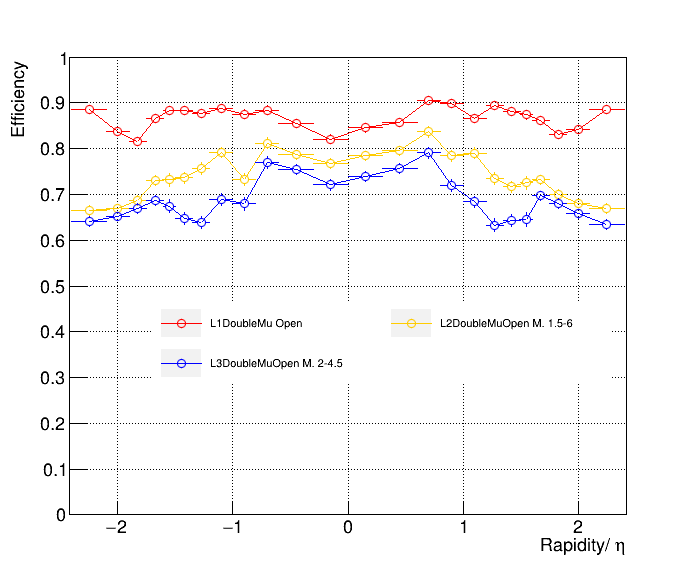

In [108]:
leg.SetNColumns(2)
leg.SetTextSize(0.020)
#leg.SetX1(0.1);leg.SetX2(0.95);leg.SetY1(0.7);leg.SetY2(0.92);
leg.SetX1(0.22);leg.SetX2(0.88);leg.SetY1(0.33);leg.SetY2(0.47);

leg.Clear()
# canv, leg = DrawTrigSeq(f_out1.Get("L1DoubleMuOpen"), 'pt', canv, _col = 221, _leg = leg, _disc = "L1DoubleMuOpen v2-6")
#canv, leg = DrawTrigSeq(f_out1.Get("L1DoubleMuZero"), 'pt', canv, _and = True, _col = 221, _leg = leg, _disc = "L1DoubleMuZero v2-6")
#canv, leg = DrawTrigSeq(f_out1.Get("L1DoubleMuSQ"), 'pt', canv, _and = True, _col = 208, _leg = leg, _disc = "L1DoubleMu SQ v2-6")

# canv, leg = DrawTrigSeq(f_out2.Get("L1DoubleMuOpen"), 'pt', canv, _and = False, _col = getcolor(0), _leg = leg, _marker = 24, _disc = "L1DoubleMuOpen")# %s" % ver1)# v2-7-mod1")
# canv, leg = DrawTrigSeq(f_out2.Get("L1DoubleMuCosmic"), 'pt', canv, _and = True, _col = getcolor(34), _leg = leg, _marker = 24, _disc = "L1DoubleMuCosmic")# %s" % ver1)# v2-7-mod1")

# canv, leg = DrawTrigSeq(f_out2.Get("L2DoubleMuOpen"), 'pt', canv, _and = True, _col = getcolor(1), _leg = leg, _marker = 24, _disc = "L2DoubleMuOpen")# %s" % ver1)# v2-7-mod1")
# canv, leg = DrawTrigSeq(f_out2.Get("L2DoubleMuCosmic"), 'pt', canv, _and = True, _col = getcolor(18), _leg = leg, _marker = 24, _disc = "L2DoubleMuCosmic")# %s" % ver1)# v2-7-mod1")

# canv, leg = DrawTrigSeq(f_out2.Get("L3DoubleMuOpen"), 'pt', canv, _and = True, _col = getcolor(3), _leg = leg, _marker = 24, _disc = "L3DoubleMuOpen")# %s" % ver1)# v2-7-mod1")
# canv, leg = DrawTrigSeq(f_out2.Get("L3DoubleMuCosmic"), 'pt', canv, _and = True, _col = getcolor(20), _leg = leg, _marker = 24, _disc = "L3DoubleMuCosmic")# %s" % ver1)# v2-7-mod1")

canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL1DoubleMu0_MaxDr3p5_Open_v"), 'y', canv, _pltmode = "Y", _and = False, _col = EColor.kRed, _leg = leg, _marker = 24, _disc = "L1DoubleMu Open")# %s" % ver1)# v2-7-mod1")
# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL1DoubleMu0_Zero_v"), 'pt', canv, _and = True, _col = EColor.kGreen+1, _leg = leg, _marker = 24, _disc = "L1DoubleMu Zero")# %s" % ver1)# v2-7-mod1")
# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL1DoubleMu0_SQ_v"), 'pt', canv, _and = True, _col = EColor.kBlue+1, _leg = leg, _marker = 24, _disc = "L1 DoubleMu SQ")# %s" % ver1)# v2-7-mod1")

# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL2DoubleMu0_Open_v"), 'phi', canv, _pltmode = "PH", _and = True, _col = EColor.kGreen+1, _leg = leg, _marker = 24, _disc = "L2DoubleMuOpen")# %s" % ver1)# v2-7-mod1")
canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL2DoubleMu0_M1p5to6_Open_v"), 'y', canv, _pltmode= "Y", _and = True, _col = EColor.kOrange+1, _leg = leg, _marker = 24, _disc = "L2DoubleMuOpen M. 1.5-6")# %s" % ver1)# v2-7-mod1")
# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL2DoubleMu2p8_M1to6p5_Open_v"), 'pt', canv, _and = True, _col = EColor.kPink+1, _leg = leg, _marker = 24, _disc = "L2DbMu pt>2.8 M. 1-6.5")# %s" % ver1)# v2-7-mod1")
canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL3DoubleMu0_Quarkonia_Open_v"), 'y', canv, _pltmode = "Y", _and = True, _col = EColor.kBlue+1, _leg = leg, _marker = 24, _disc = "L3DoubleMuOpen M. 2-4.5")# %s" % ver1)# v2-7-mod1")
# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL3DoubleMu0_M0toInf_Open_v"), 'y', canv, _pltmode = "Y", _and = True, _col = EColor.kAzure+4, _leg = leg, _marker = 24, _disc = "L3DoubleMuOpen M. 0-999")# %s" % ver1)# v2-7-mod1")
# canv, leg = DrawTrigSeq(f_leg.Get("HLT_HIL1DoubleMuOpen_v"), 'pt', canv, _and = True, _col = 2, _leg = leg, _disc = "HLT_HIL1DoubleMu0_Legacy_v")

leg.DrawClone()
canv.Draw()
canv.SaveAs("%s/Eff_pt_RateCut_Comp_%s.pdf" % (pltdir, ver) )
canv.SaveAs("%s/Eff_pt_RateCut_Comp_%s.png" % (pltdir, ver) )

leg.Clear()

Info in <TCanvas::Print>: pdf file Eff_v0_1/Eff_pt_RateCut_Comp_JpsiEMB_Gen_acc_v0_1.pdf has been created
Info in <TCanvas::Print>: png file Eff_v0_1/Eff_pt_RateCut_Comp_JpsiEMB_Gen_acc_v0_1.png has been created


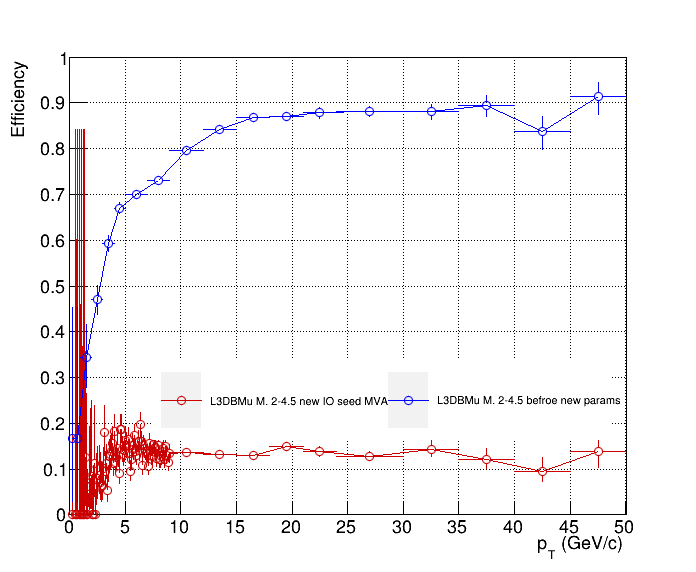

In [100]:
leg.SetNColumns(2)
leg.SetTextSize(0.020)
#leg.SetX1(0.1);leg.SetX2(0.95);leg.SetY1(0.7);leg.SetY2(0.92);
leg.SetX1(0.22);leg.SetX2(0.88);leg.SetY1(0.23);leg.SetY2(0.37);

leg.Clear()
#canv, leg = DrawTrigSeq(f_out1.Get("L1DoubleMuOpen"), 'pt', canv, _col = 221, _leg = leg, _disc = "L1DoubleMuOpen v2-6")
#canv, leg = DrawTrigSeq(f_out1.Get("L1DoubleMuZero"), 'pt', canv, _and = True, _col = 221, _leg = leg, _disc = "L1DoubleMuZero v2-6")
#canv, leg = DrawTrigSeq(f_out1.Get("L1DoubleMuSQ"), 'pt', canv, _and = True, _col = 208, _leg = leg, _disc = "L1DoubleMu SQ v2-6")

# canv, leg = DrawTrigSeq(f_out2.Get("L1DoubleMuOpen"), 'pt', canv, _and = False, _col = getcolor(0), _leg = leg, _marker = 24, _disc = "L1DoubleMuOpen")# %s" % ver1)# v2-7-mod1")
# canv, leg = DrawTrigSeq(f_out2.Get("L1DoubleMuCosmic"), 'pt', canv, _and = True, _col = getcolor(34), _leg = leg, _marker = 24, _disc = "L1DoubleMuCosmic")# %s" % ver1)# v2-7-mod1")

# canv, leg = DrawTrigSeq(f_out2.Get("L2DoubleMuOpen"), 'pt', canv, _and = True, _col = getcolor(1), _leg = leg, _marker = 24, _disc = "L2DoubleMuOpen")# %s" % ver1)# v2-7-mod1")
# canv, leg = DrawTrigSeq(f_out2.Get("L2DoubleMuCosmic"), 'pt', canv, _and = True, _col = getcolor(18), _leg = leg, _marker = 24, _disc = "L2DoubleMuCosmic")# %s" % ver1)# v2-7-mod1")

# canv, leg = DrawTrigSeq(f_out2.Get("L3DoubleMuOpen"), 'pt', canv, _and = True, _col = getcolor(3), _leg = leg, _marker = 24, _disc = "L3DoubleMuOpen")# %s" % ver1)# v2-7-mod1")
# canv, leg = DrawTrigSeq(f_out2.Get("L3DoubleMuCosmic"), 'pt', canv, _and = True, _col = getcolor(20), _leg = leg, _marker = 24, _disc = "L3DoubleMuCosmic")# %s" % ver1)# v2-7-mod1")

# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL1DoubleMu0_Open_v"), 'pt', canv, _and = False, _col = EColor.kRed, _leg = leg, _marker = 24, _disc = "L1DoubleMu Open")# %s" % ver1)# v2-7-mod1")
# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL1DoubleMu0_Zero_v"), 'pt', canv, _and = True, _col = EColor.kGreen+1, _leg = leg, _marker = 24, _disc = "L1DoubleMu Zero")# %s" % ver1)# v2-7-mod1")
# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL1DoubleMu0_SQ_v"), 'pt', canv, _and = True, _col = EColor.kBlue+1, _leg = leg, _marker = 24, _disc = "L1 DoubleMu SQ")# %s" % ver1)# v2-7-mod1")

# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL2DoubleMu0_Open_v"), 'pt', canv, _and = True, _col = EColor.kGreen+1, _leg = leg, _marker = 24, _disc = "L2DoubleMuOpen")# %s" % ver1)# v2-7-mod1")
# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL2DoubleMu0_M1to6p5_Open_v"), 'pt', canv, _and = True, _col = EColor.kOrange+1, _leg = leg, _marker = 24, _disc = "L2DoubleMuOpen M. 1-6.5")# %s" % ver1)# v2-7-mod1")
# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL2DoubleMu2p8_M1to6p5_Open_v"), 'pt', canv, _and = True, _col = EColor.kPink+1, _leg = leg, _marker = 24, _disc = "L2DbMu pt>2.8 M. 1-6.5")# %s" % ver1)# v2-7-mod1")
# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL3DoubleMu0_M2to4p5_Open_v"), 'pt', canv, _and = False, _col = EColor.kRed+1, _leg = leg, _marker = 24, _disc = "L3DBMu M. 2-4.5 new IO seed MVA")# %s" % ver1)# v2-7-mod1")
# canv, leg = DrawTrigSeq(f_out3.Get("HLT_HIL3DoubleMu0_M2to4p5_Open_v"), 'pt', canv, _and = True, _col = EColor.kBlue+1, _leg = leg, _marker = 24, _disc = "L3DBMu M. 2-4.5 after GPU HIon")# %s" % ver1)# v2-7-mod1")

canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL3DoubleMu0_M0toInf_Open_v"), 'pt', canv, _and = False, _col = EColor.kRed+1, _leg = leg, _marker = 24, _disc = "L3DBMu M. 2-4.5 new IO seed MVA")# %s" % ver1)# v2-7-mod1")
canv, leg = DrawTrigSeq(f_out3.Get("HLT_HIL3DoubleMu0_M0toInf_Open_v"), 'pt', canv, _and = True, _col = EColor.kBlue+1, _leg = leg, _marker = 24, _disc = "L3DBMu M. 2-4.5 befroe new params")# %s" % ver1)# v2-7-mod1")

# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL3DoubleMu2_M2to4p5_Open_v"), 'pt', canv, _and = True, _col = EColor.kOrange+1, _leg = leg, _marker = 24, _disc = "L3DbMu pt>2 M. 2-4.5 old Par")# %s" % ver1)# v2-7-mod1")
# canv, leg = DrawTrigSeq(f_out3.Get("HLT_HIL3DoubleMu2_M2to4p5_Open_v"), 'pt', canv, _and = True, _col = EColor.kGreen+1, _leg = leg, _marker = 24, _disc = "L3DbMu pt>2 M. 2-4.5 new Par")# %s" % ver1)# v2-7-mod1")

# canv, leg = DrawTrigSeq(f_out2.Get("L3DoubleMuOpen2_M2to4p5"), 'pt', canv, _and = True, _col = EColor.kMagenta+1, _leg = leg, _marker = 24, _disc = "L3DoubleMuOpen2_M2to4p5")# %s" % ver1)# v2-7-mod1")
# canv, leg = DrawTrigSeq(f_out2.Get("L3DoubleMuOpen1p5_M2to4p5"), 'pt', canv, _and = True, _col = EColor.kBlue+2, _leg = leg, _marker = 24, _disc = "L3DoubleMuOpen1p5_M2to4p5")# %s" % ver1)# v2-7-mod1")
# canv, leg = DrawTrigSeq(f_out2.Get("L3DoubleMuOpen1_M2to4p5"), 'pt', canv, _and = True, _col = EColor.kBlue+3, _leg = leg, _marker = 24, _disc = "L3DoubleMuOpen1_M2to4p5")# %s" % ver1)# v2-7-mod1")
# canv, leg = DrawTrigSeq(f_out2.Get("L3DoubleMuOpen0p5_M2to4p5"), 'pt', canv, _and = True, _col = EColor.kBlue+5, _leg = leg, _marker = 24, _disc = "L3DoubleMuOpen0p5_M2to4p5")# %s" % ver1)# v2-7-mod1")
# canv, leg = DrawTrigSeq(f_out2.Get("L3DoubleMuOpen_M2to4p5"), 'pt', canv, _and = True, _col = EColor.kRed+3, _leg = leg, _marker = 24, _disc = "L3DoubleMuOpen_M2to4p5")# %s" % ver1)# v2-7-mod1")
# canv, leg = DrawTrigSeq(f_out2.Get("L3DoubleMuOpen_M7to15"), 'pt', canv, _and = True, _col = EColor.kTeal+1, _leg = leg, _marker = 24, _disc = "L3DoubleMuOpen_M7to15")# %s" % ver1)# v2-7-mod1")
# canv, leg = DrawTrigSeq(f_out2.Get("L3DoubleMuOpen_Quarkonia"), 'pt', canv, _and = True, _col = EColor.kRed+4, _leg = leg, _marker = 24, _disc = "L3DoubleMuOpen_Quarkonia")# %s" % ver1)# v2-7-mod1")
# canv, leg = DrawTrigSeq(f_out2.Get("L3DoubleMuOpen_Quarkonia_LowMpT2"), 'pt', canv, _and = True, _col = EColor.kBlue+5, _leg = leg, _marker = 24, _disc = "L3DoubleMuOpen_Quarkonia_LowMpT2")# %s" % ver1)# v2-7-mod1")
# canv, leg = DrawTrigSeq(f_out2.Get("L2DoubleMuOpen_M1to6p5"), 'pt', canv, _and = True, _col = EColor.kPink-3, _leg = leg, _marker = 24, _disc = "L2DoubleMuOpen_M1to6p5")# %s" % ver1)# v2-7-mod1")
# canv, leg = DrawTrigSeq(f_out2.Get("L2DoubleMuOpen_M6p5to16"), 'pt', canv, _and = True, _col = EColor.kGreen+3, _leg = leg, _marker = 24, _disc = "L2DoubleMuOpen_M6p5to16")# %s" % ver1)# v2-7-mod1")
# canv, leg = DrawTrigSeq(f_out2.Get("L2DoubleMuOpen_M1to16"), 'pt', canv, _and = True, _col = EColor.kBlue+5, _leg = leg, _marker = 24, _disc = "L2DoubleMuOpen_M1to16")# %s" % ver1)# v2-7-mod1")



# canv, leg = DrawTrigSeq(f_leg.Get("HLT_HIL1DoubleMuOpen_v"), 'pt', canv, _and = True, _col = 2, _leg = leg, _disc = "HLT_HIL1DoubleMu0_Legacy_v")
leg.DrawClone()
canv.Draw()
canv.SaveAs("%s/Eff_pt_RateCut_Comp_%s.pdf" % (pltdir, ver) )
canv.SaveAs("%s/Eff_pt_RateCut_Comp_%s.png" % (pltdir, ver) )

leg.Clear()

In [ ]:
b = f_out2.GetListOfKeys()
# for item in b:
#     print("canv, leg = DrawTrigSeq(f_out2.Get(\"" +  item.GetName() + "\"), 'pt', canv, _and = True, _col = EColor.kRed, _leg = leg, _marker = 24, _disc = \""+ item.GetName() +"\")")

In [101]:
leg.SetNColumns(1)
leg.SetTextSize(0.020)
#leg.SetX1(0.1);leg.SetX2(0.95);leg.SetY1(0.7);leg.SetY2(0.92);
leg.SetX1(0.3);leg.SetX2(0.87);leg.SetY1(0.12);leg.SetY2(0.53);

leg.Clear()

# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL1DoubleMu0_Open"), 'pt', canv, _and = False, _col = EColor.kBlack, _leg = leg, _marker = 24, _disc = "HLT_HIL1DoubleMu0_Open")

# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL2DoubleMu0_Open"), 'pt', canv, _and = True, _col = EColor.kRed +1, _leg = leg, _marker = 24, _disc = "HLT_HIL2DoubleMu0_Open")
# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL2DoubleMu0_DoHLTCut_Narrow_Open"), 'pt', canv, _and = True, _col = EColor.kGreen +1, _leg = leg, _marker = 24, _disc = "HLT_HIL2DoubleMu0_M2.3-4.8_Open")
# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL2DoubleMu0_DoHLTCutPT_Narrow_Open"), 'pt', canv, _and = True, _col = EColor.kOrange +1, _leg = leg, _marker = 24, _disc = "HLT_HIL2DoubleMu2.8_M2.3-4.8_Open")

# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL2DoubleMu0_M1to6p5_Open"), 'pt', canv, _and = True, _col = EColor.kOrange +1, _leg = leg, _marker = 24, _disc = "HLT_HIL2DoubleMu0_M1to6p5_Open")

# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL2DoubleMu0_M6p5to16_Open"), 'pt', canv, _and = True, _col = EColor.kRed, _leg = leg, _marker = 24, _disc = "HLT_HIL2DoubleMu0_M6p5to16_Open")

# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL2DoubleMu0_M1to16_Open"), 'pt', canv, _and = True, _col = EColor.kRed, _leg = leg, _marker = 24, _disc = "HLT_HIL2DoubleMu0_M1to16_Open")

# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL2DoubleMu4_Open"), 'pt', canv, _and = True, _col = EColor.kBlue+1, _leg = leg, _marker = 24, _disc = "HLT_HIL2DoubleMu4_Open")

# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL3DoubleMuPre0_Open"), 'pt', canv, _and = True, _col = EColor.kRed, _leg = leg, _marker = 24, _disc = "HLT_HIL3DoubleMuPre0_Open")
# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL3DoubleMuPre3p8_Open"), 'pt', canv, _and = True, _col = EColor.kRed, _leg = leg, _marker = 24, _disc = "HLT_HIL3DoubleMuPre3p8_Open")
# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL3DoubleMuPre0_M2to4p5_Open"), 'pt', canv, _and = True, _col = EColor.kRed, _leg = leg, _marker = 24, _disc = "HLT_HIL3DoubleMuPre0_M2to4p5_Open")
# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL3DoubleMuPre0_M7to15_Open"), 'pt', canv, _and = True, _col = EColor.kRed, _leg = leg, _marker = 24, _disc = "HLT_HIL3DoubleMuPre0_M7to15_Open")

canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL3DoubleMu0_M0toInf_Open"), 'pt', canv, _and = False, _col = EColor.kBlue +1, _leg = leg, _marker = 24, _disc = "HLT_HIL3DoubleMu0_M0toInf_Open")
# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL3DoubleMu3p8_M0toInf_Open"), 'pt', canv, _and = True, _col = EColor.kRed, _leg = leg, _marker = 24, _disc = "HLT_HIL3DoubleMu3p8_M0toInf_Open")
# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL3DoubleMu0_M7to15_Open"), 'pt', canv, _and = True, _col = EColor.kYellow+1, _leg = leg, _marker = 24, _disc = "HLT_HIL3DoubleMu0_M7to15_Open")
# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL3DoubleMu2_M7to15_Open"), 'pt', canv, _and = True, _col = EColor.kBlue+1, _leg = leg, _marker = 24, _disc = "HLT_HIL3DoubleMu2_M7to15_Open")
# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL3DoubleMu1p5_M7to15_Open"), 'pt', canv, _and = True, _col = EColor.kRed, _leg = leg, _marker = 24, _disc = "HLT_HIL3DoubleMu1p5_M7to15_Open")
# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL3DoubleMu1_M7to15_Open"), 'pt', canv, _and = True, _col = EColor.kRed, _leg = leg, _marker = 24, _disc = "HLT_HIL3DoubleMu1_M7to15_Open")
# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL3DoubleMu0_Quarkonia_Open"), 'pt', canv, _and = True, _col = EColor.kOrange+1, _leg = leg, _marker = 24, _disc = "HLT_HIL3DoubleMu0_Quarkonia_Open")
# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL3DoubleMu0_Quarkonia_LowMpT2_Open"), 'pt', canv, _and = True, _col = EColor.kTeal, _leg = leg, _marker = 24, _disc = "HLT_HIL3DoubleMu0_Quarkonia_LowMpT2_Open")
# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL3DoubleMu0_Quarkonia_LowMpT2HighMpT1p5_Open"), 'pt', canv, _and = True, _col = EColor.kMagenta, _leg = leg, _marker = 24, _disc = "HLT_HIL3DoubleMu0_Quarkonia_LowMpT2HighMpT1p5_Open")
# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL3DoubleMu0_Quarkonia_LowMpT2HighMpT1_Open"), 'pt', canv, _and = True, _col = EColor.kRed, _leg = leg, _marker = 24, _disc = "HLT_HIL3DoubleMu0_Quarkonia_LowMpT2HighMpT1_Open")
# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL3DoubleMu2_Quarkonia_Open"), 'pt', canv, _and = True, _col = EColor.kBlue+1, _leg = leg, _marker = 24, _disc = "HLT_HIL3DoubleMu2_Quarkonia_Open")

# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL3DoubleMu0_M0toInf_DoONIACut_Open"), 'pt', canv, _and = True, _col = EColor.kPink +1, _leg = leg, _marker = 24, _disc = "HLT_HIL3DoubleMu0_M2.5to4_Open")

# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL3DoubleMu0_M0toInf_DoHLTCut_Narrow_Open"), 'pt', canv, _and = True, _col = EColor.kPink +1, _leg = leg, _marker = 24, _disc = "HLT_HIL3DoubleMu0_M2.5to4_Open")

# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL3DoubleMu0_M2to4p5_Open"), 'pt', canv, _and = True, _col = EColor.kTeal +1, _leg = leg, _marker = 24, _disc = "HLT_HIL3DoubleMu0_M2to4p5_Open")

# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL3DoubleMu2_M2to4p5_Open"), 'pt', canv, _and = True, _col = EColor.kAzure +1, _leg = leg, _marker = 24, _disc = "HLT_HIL3DoubleMu2_M2to4p5_Open")
# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL3DoubleMu1p5_M2to4p5_Open"), 'pt', canv, _and = True, _col = EColor.kRed, _leg = leg, _marker = 24, _disc = "HLT_HIL3DoubleMu1p5_M2to4p5_Open")
# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL3DoubleMu1_M2to4p5_Open"), 'pt', canv, _and = True, _col = EColor.kRed, _leg = leg, _marker = 24, _disc = "HLT_HIL3DoubleMu1_M2to4p5_Open")

# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL2SingleMu3_Open"), 'pt', canv, _and = False, _col = EColor.kRed, _leg = leg, _marker = 24, _disc = "HLT_HIL2SingleMu3_Open")
# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL2SingleMu5_Open"), 'pt', canv, _and = True, _col = EColor.kRed, _leg = leg, _marker = 24, _disc = "HLT_HIL2SingleMu5_Open")
# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL2SingleMu7_Open"), 'pt', canv, _and = True, _col = EColor.kRed, _leg = leg, _marker = 24, _disc = "HLT_HIL2SingleMu7_Open")
# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL3SingleMu3_Open"), 'pt', canv, _and = True, _col = EColor.kRed, _leg = leg, _marker = 24, _disc = "HLT_HIL3SingleMu3_Open")
# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL3SingleMu5_Open"), 'pt', canv, _and = True, _col = EColor.kRed, _leg = leg, _marker = 24, _disc = "HLT_HIL3SingleMu5_Open")
# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL3SingleMu7_Open"), 'pt', canv, _and = True, _col = EColor.kRed, _leg = leg, _marker = 24, _disc = "HLT_HIL3SingleMu7_Open")


# canv, leg = DrawTrigSeq(f_leg.Get("HLT_HIL1DoubleMuOpen_v"), 'pt', canv, _and = True, _col = 2, _leg = leg, _disc = "HLT_HIL1DoubleMu0_Legacy_v")
leg.DrawClone()
canv.Draw()
canv.SaveAs("%s/Eff_pt_RateCut_Comp_%s.pdf" % (pltdir, ver) )
canv.SaveAs("%s/Eff_pt_RateCut_Comp_%s.png" % (pltdir, ver) )

leg.Clear()

AttributeError: 'TObject' object has no attribute 'Get'

Warning in <TEfficiency::GetEfficiencyErrorLow>: frequentist confidence intervals for weights are only supported by the normal approximation
Info in <TEfficiency::GetEfficiencyErrorLow>: setting statistic option to kFNormal
Warning in <TEfficiency::GetEfficiencyErrorLow>: frequentist confidence intervals for weights are only supported by the normal approximation
Info in <TEfficiency::GetEfficiencyErrorLow>: setting statistic option to kFNormal
Info in <TCanvas::Print>: pdf file Eff_v0_1/Eff_pt_RateCut_Comp_JpsiEMB_Gen_acc_v0_1.pdf has been created
Info in <TCanvas::Print>: png file Eff_v0_1/Eff_pt_RateCut_Comp_JpsiEMB_Gen_acc_v0_1.png has been created


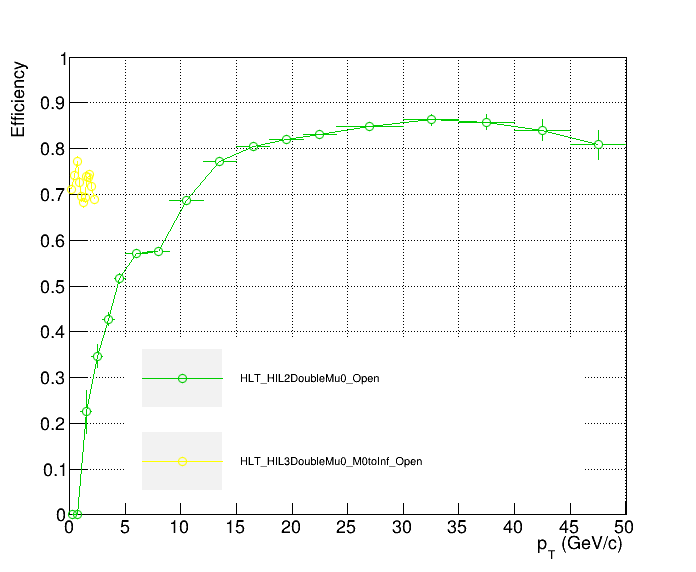

In [10]:
leg.SetNColumns(1)
leg.SetTextSize(0.020)
#leg.SetX1(0.1);leg.SetX2(0.95);leg.SetY1(0.7);leg.SetY2(0.92);
leg.SetX1(0.18);leg.SetX2(0.84);leg.SetY1(0.12);leg.SetY2(0.41);

leg.Clear()

# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL1DoubleMu0_Open"), 'y', canv, _and = False, _col = EColor.kRed, _leg = leg, _marker = 24, _disc = "HLT_HIL1DoubleMu0_Open")

canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL2DoubleMu0_Open"), 'pt', canv, _and = False, _col = EColor.kGreen +1, _leg = leg, _marker = 24, _disc = "HLT_HIL2DoubleMu0_Open")

# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL2DoubleMu0_M1to6p5_Open"), 'pt', canv, _and = True, _col = EColor.kOrange +1, _leg = leg, _marker = 24, _disc = "HLT_HIL2DoubleMu0_M1to6p5_Open")

# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL2DoubleMu0_M6p5to16_Open"), 'pt', canv, _and = True, _col = EColor.kRed, _leg = leg, _marker = 24, _disc = "HLT_HIL2DoubleMu0_M6p5to16_Open")

# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL2DoubleMu0_M1to16_Open"), 'pt', canv, _and = True, _col = EColor.kRed, _leg = leg, _marker = 24, _disc = "HLT_HIL2DoubleMu0_M1to16_Open")

# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL2DoubleMu4_Open"), 'pt', canv, _and = True, _col = EColor.kBlue+1, _leg = leg, _marker = 24, _disc = "HLT_HIL2DoubleMu4_Open")

# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL3DoubleMuPre0_Open"), 'pt', canv, _and = True, _col = EColor.kRed, _leg = leg, _marker = 24, _disc = "HLT_HIL3DoubleMuPre0_Open")
# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL3DoubleMuPre3p8_Open"), 'pt', canv, _and = True, _col = EColor.kRed, _leg = leg, _marker = 24, _disc = "HLT_HIL3DoubleMuPre3p8_Open")
# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL3DoubleMuPre0_M2to4p5_Open"), 'pt', canv, _and = True, _col = EColor.kRed, _leg = leg, _marker = 24, _disc = "HLT_HIL3DoubleMuPre0_M2to4p5_Open")
# canv, leg µK= DrawTrigSeq(f_out2.Get("HLT_HIL3DoubleMuPre0_M7to15_Open"), 'pt', canv, _and = True, _col = EColor.kRed, _leg = leg, _marker = 24, _disc = "HLT_HIL3DoubleMuPre0_M7to15_Open")

canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL3DoubleMu0_M0toInf_Open"), 'y', canv, _and = True, _col = EColor.kYellow +1, _leg = leg, _marker = 24, _disc = "HLT_HIL3DoubleMu0_M0toInf_Open")
# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL3DoubleMu3p8_M0toInf_Open"), 'pt', canv, _and = True, _col = EColor.kRed, _leg = leg, _marker = 24, _disc = "HLT_HIL3DoubleMu3p8_M0toInf_Open")
# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL3DoubleMu0_M7to15_Open"), 'pt', canv, _and = True, _col = EColor.kYellow+1, _leg = leg, _marker = 24, _disc = "HLT_HIL3DoubleMu0_M7to15_Open")
# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL3DoubleMu2_M7to15_Open"), 'pt', canv, _and = True, _col = EColor.kBlue+1, _leg = leg, _marker = 24, _disc = "HLT_HIL3DoubleMu2_M7to15_Open")
# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL3DoubleMu1p5_M7to15_Open"), 'pt', canv, _and = True, _col = EColor.kRed, _leg = leg, _marker = 24, _disc = "HLT_HIL3DoubleMu1p5_M7to15_Open")
# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL3DoubleMu1_M7to15_Open"), 'pt', canv, _and = True, _col = EColor.kRed, _leg = leg, _marker = 24, _disc = "HLT_HIL3DoubleMu1_M7to15_Open")
# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL3DoubleMu0_Quarkonia_Open"), 'pt', canv, _and = True, _col = EColor.kOrange+1, _leg = leg, _marker = 24, _disc = "HLT_HIL3DoubleMu0_Quarkonia_Open")
# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL3DoubleMu0_Quarkonia_LowMpT2_Open"), 'pt', canv, _and = True, _col = EColor.kTeal, _leg = leg, _marker = 24, _disc = "HLT_HIL3DoubleMu0_Quarkonia_LowMpT2_Open")
# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL3DoubleMu0_Quarkonia_LowMpT2HighMpT1p5_Open"), 'pt', canv, _and = True, _col = EColor.kMagenta, _leg = leg, _marker = 24, _disc = "HLT_HIL3DoubleMu0_Quarkonia_LowMpT2HighMpT1p5_Open")
# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL3DoubleMu0_Quarkonia_LowMpT2HighMpT1_Open"), 'y', canv, _and = True, _col = EColor.kRed, _leg = leg, _marker = 24, _disc = "HLT_HIL3DoubleMu0_Quarkonia_LowMpT2HighMpT1_Open")
# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL3DoubleMu2_Quarkonia_Open"), 'y', canv, _and = True, _col = EColor.kBlue+1, _leg = leg, _marker = 24, _disc = "HLT_HIL3DoubleMu2_Quarkonia_Open")
# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL3DoubleMu0_M2to4p5_Open"), 'y', canv, _and = True, _col = EColor.kOrange +1, _leg = leg, _marker = 24, _disc = "HLT_HIL3DoubleMu0_M2to4p5_Open")

# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL3DoubleMu2_M2to4p5_Open"), 'y', canv, _and = True, _col = EColor.kGreen +1, _leg = leg, _marker = 24, _disc = "HLT_HIL3DoubleMu2_M2to4p5_Open")
# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL3DoubleMu1p5_M2to4p5_Open"), 'pt', canv, _and = True, _col = EColor.kRed, _leg = leg, _marker = 24, _disc = "HLT_HIL3DoubleMu1p5_M2to4p5_Open")
# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL3DoubleMu1_M2to4p5_Open"), 'pt', canv, _and = True, _col = EColor.kRed, _leg = leg, _marker = 24, _disc = "HLT_HIL3DoubleMu1_M2to4p5_Open")

# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL2SingleMu3_Open"), 'eta', canv, _and = False, _col = EColor.kRed, _leg = leg, _marker = 24, _disc = "HLT_HIL2SingleMu3_Open")
# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL2SingleMu5_Open"), 'eta', canv, _and = True, _col = EColor.kOrange+1, _leg = leg, _marker = 24, _disc = "HLT_HIL2SingleMu5_Open")
# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL2SingleMu7_Open"), 'eta', canv, _and = True, _col = EColor.kOrange +5, _leg = leg, _marker = 24, _disc = "HLT_HIL2SingleMu7_Open")
# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL3SingleMu3_Open"), 'eta', canv, _and = True, _col = EColor.kYellow +4, _leg = leg, _marker = 24, _disc = "HLT_HIL3SingleMu3_Open")
# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL3SingleMu5_Open"), 'eta', canv, _and = True, _col = EColor.kMagenta +1, _leg = leg, _marker = 24, _disc = "HLT_HIL3SingleMu5_Open")

# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL3SingleMu7_Open"), 'eta', canv, _and = True, _col = EColor.kMagenta +6, _leg = leg, _marker = 24, _disc = "HLT_HIL3SingleMu7_Open")


# canv, leg = DrawTrigSeq(f_leg.Get("HLT_HIL1DoubleMuOpen_v"), 'pt', canv, _and = True, _col = 2, _leg = leg, _disc = "HLT_HIL1DoubleMu0_Legacy_v")
leg.DrawClone()
canv.Draw()
canv.SaveAs("%s/Eff_pt_RateCut_Comp_%s.pdf" % (pltdir, ver) )
canv.SaveAs("%s/Eff_pt_RateCut_Comp_%s.png" % (pltdir, ver) )

leg.Clear()

Info in <TCanvas::Print>: pdf file Eff_v0_1/Eff_cent_RateCut_Comp_JpsiEMB_Gen_acc_v0_1.pdf has been created
Info in <TCanvas::Print>: png file Eff_v0_1/Eff_cent_RateCut_Comp_JpsiEMB_Gen_acc_v0_1.png has been created


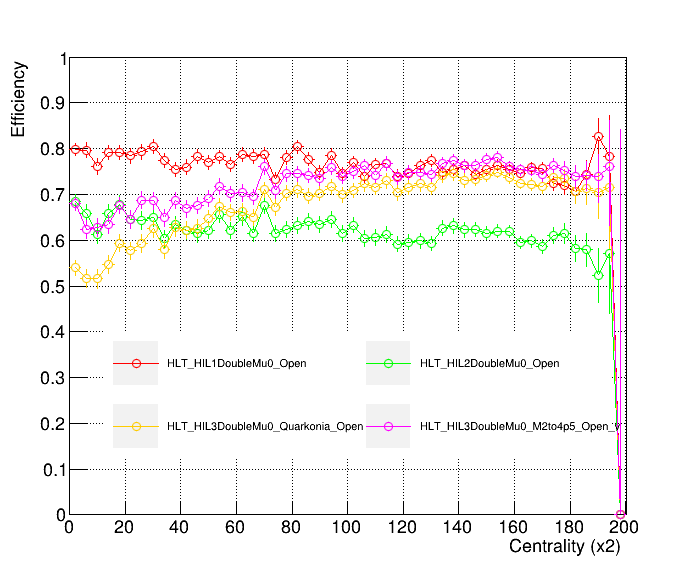

In [148]:
leg.SetNColumns(2)
leg.SetTextSize(0.020)
leg.SetX1(0.15) ;leg.SetX2(0.88);leg.SetY1(0.2);leg.SetY2(0.42);
# leg.SetX1(0.1);leg.SetX2(0.92);leg.SetY1(0.82);leg.SetY2(0.99);

leg.Clear()

canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL1DoubleMu0_MaxDr3p5_Open_v"), 'cent', canv, _and = False, _col = EColor.kRed, _leg = leg, _marker = 24, _disc = "HLT_HIL1DoubleMu0_Open", _pltmode = 'C')

canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL2DoubleMu0_Open_v"), 'cent', canv, _and = True, _col = EColor.kGreen +1, _leg = leg, _marker = 24, _disc = "HLT_HIL2DoubleMu0_Open", _pltmode = 'C')
canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL3DoubleMu0_Quarkonia_Open_v"), 'cent', canv, _and = True, _col = EColor.kOrange+1, _leg = leg, _marker = 24, _disc = "HLT_HIL3DoubleMu0_Quarkonia_Open", _pltmode = 'C')
canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL3DoubleMu0_M2to4p5_Open_v"), 'cent', canv, _and = True, _col = EColor.kMagenta+1, _leg = leg, _marker = 24, _disc = "HLT_HIL3DoubleMu0_M2to4p5_Open_v", _pltmode = 'C')
# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL3DoubleMuLikeMu12_Open_v"), 'cent', canv, _and = True, _col = EColor.kMagenta+1, _leg = leg, _marker = 24, _disc = "HLT_HIL3DoubleMuLikeMu12_Open_v", _pltmode = 'C')

# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL2DoubleMu0_M1to6p5_Open_v"), 'cent', canv, _and = True, _col = EColor.kOrange +1, _leg = leg, _marker = 24, _disc = "HLT_HIL2DoubleMu0_M1to6p5_Open", _pltmode = 'C')

# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL2DoubleMu0_M6p5to16_Open"), 'pt', canv, _and = True, _col = EColor.kRed, _leg = leg, _marker = 24, _disc = "HLT_HIL2DoubleMu0_M6p5to16_Open", _pltmode = 'C')

# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL2DoubleMu0_M1to16_Open"), 'pt', canv, _and = True, _col = EColor.kRed, _leg = leg, _marker = 24, _disc = "HLT_HIL2DoubleMu0_M1to16_Open", _pltmode = 'C')

# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL2DoubleMu4_Open"), 'pt', canv, _and = True, _col = EColor.kBlue+1, _leg = leg, _marker = 24, _disc = "HLT_HIL2DoubleMu4_Open", _pltmode = 'C')

# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL3DoubleMuPre0_Open"), 'pt', canv, _and = True, _col = EColor.kRed, _leg = leg, _marker = 24, _disc = "HLT_HIL3DoubleMuPre0_Open", _pltmode = 'C')
# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL3DoubleMuPre3p8_Open"), 'pt', canv, _and = True, _col = EColor.kRed, _leg = leg, _marker = 24, _disc = "HLT_HIL3DoubleMuPre3p8_Open", _pltmode = 'C')
# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL3DoubleMuPre0_M2to4p5_Open"), 'pt', canv, _and = True, _col = EColor.kRed, _leg = leg, _marker = 24, _disc = "HLT_HIL3DoubleMuPre0_M2to4p5_Open", _pltmode = 'C')
# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL3DoubleMuPre0_M7to15_Open"), 'pt', canv, _and = True, _col = EColor.kRed, _leg = leg, _marker = 24, _disc = "HLT_HIL3DoubleMuPre0_M7to15_Open", _pltmode = 'C')

# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL3DoubleMu0_M2to4p5_Open_v"), 'cent', canv, _and = True, _col = EColor.kBlue +1, _leg = leg, _marker = 24, _disc = "HLT_HIL3DoubleMu0_M0toInf_Open", _pltmode = 'C')
# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL3DoubleMu0_M0toInf_Open_v"), 'cent', canv, _and = True, _col = EColor.kRed, _leg = leg, _marker = 24, _disc = "HLT_HIL3DoubleMu0_M0toInf_Open", _pltmode = 'C')
# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL3DoubleMu0_M7to15_Open"), 'pt', canv, _and = True, _col = EColor.kYellow+1, _leg = leg, _marker = 24, _disc = "HLT_HIL3DoubleMu0_M7to15_Open", _pltmode = 'C')
# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL3DoubleMu2_M7to15_Open"), 'pt', canv, _and = True, _col = EColor.kBlue+1, _leg = leg, _marker = 24, _disc = "HLT_HIL3DoubleMu2_M7to15_Open", _pltmode = 'C')
# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL3DoubleMu1p5_M7to15_Open"), 'pt', canv, _and = True, _col = EColor.kRed, _leg = leg, _marker = 24, _disc = "HLT_HIL3DoubleMu1p5_M7to15_Open", _pltmode = 'C')
# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL3DoubleMu1_M7to15_Open"), 'pt', canv, _and = True, _col = EColor.kRed, _leg = leg, _marker = 24, _disc = "HLT_HIL3DoubleMu1_M7to15_Open", _pltmode = 'C')
# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL3DoubleMu0_Quarkonia_LowMpT2_Open"), 'pt', canv, _and = True, _col = EColor.kTeal, _leg = leg, _marker = 24, _disc = "HLT_HIL3DoubleMu0_Quarkonia_LowMpT2_Open", _pltmode = 'C')
# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL3DoubleMu0_Quarkonia_LowMpT2HighMpT1p5_Open"), 'pt', canv, _and = True, _col = EColor.kMagenta, _leg = leg, _marker = 24, _disc = "HLT_HIL3DoubleMu0_Quarkonia_LowMpT2HighMpT1p5_Open", _pltmode = 'C')
# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL3DoubleMu0_Quarkonia_LowMpT2HighMpT1_Open"), 'cent', canv, _and = True, _col = EColor.kRed, _leg = leg, _marker = 24, _disc = "HLT_HIL3DoubleMu0_Quarkonia_LowMpT2HighMpT1_Open", _pltmode = 'C')
# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL3DoubleMu2_Quarkonia_Open"), 'cent', canv, _and = True, _col = EColor.kBlue+1, _leg = leg, _marker = 24, _disc = "HLT_HIL3DoubleMu2_Quarkonia_Open", _pltmode = 'C')
# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL3DoubleMu0_M2to4p5_Open"), 'cent', canv, _and = True, _col = EColor.kOrange +1, _leg = leg, _marker = 24, _disc = "HLT_HIL3DoubleMu0_M2to4p5_Open", _pltmode = 'C')

# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL3DoubleMu2_M2to4p5_Open"), 'cent', canv, _and = True, _col = EColor.kGreen +1, _leg = leg, _marker = 24, _disc = "HLT_HIL3DoubleMu2_M2to4p5_Open", _pltmode = 'C')
# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL3DoubleMu1p5_M2to4p5_Open"), 'pt', canv, _and = True, _col = EColor.kRed, _leg = leg, _marker = 24, _disc = "HLT_HIL3DoubleMu1p5_M2to4p5_Open", _pltmode = 'C')
# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL3DoubleMu1_M2to4p5_Open"), 'pt', canv, _and = True, _col = EColor.kRed, _leg = leg, _marker = 24, _disc = "HLT_HIL3DoubleMu1_M2to4p5_Open", _pltmode = 'C')

# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL2SingleMu3_Open"), 'cent', canv, _and = False, _col = EColor.kRed, _leg = leg, _marker = 24, _disc = "HLT_HIL2SingleMu3_Open", _pltmode = 'C')
# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL2SingleMu5_Open"), 'pt', canv, _and = True, _col = EColor.kRed, _leg = leg, _marker = 24, _disc = "HLT_HIL2SingleMu5_Open", _pltmode = 'C')
# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL2SingleMu7_Open"), 'pt', canv, _and = True, _col = EColor.kRed, _leg = leg, _marker = 24, _disc = "HLT_HIL2SingleMu7_Open", _pltmode = 'C')
# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL3SingleMu3_Open"), 'cent', canv, _and = True, _col = EColor.kRed, _leg = leg, _marker = 24, _disc = "HLT_HIL3SingleMu3_Open", _pltmode = 'C')
# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL3SingleMu5_Open"), 'pt', canv, _and = True, _col = EColor.kRed, _leg = leg, _marker = 24, _disc = "HLT_HIL3SingleMu5_Open", _pltmode = 'C')
# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL3SingleMu7_Open"), 'pt', canv, _and = True, _col = EColor.kRed, _leg = leg, _marker = 24, _disc = "HLT_HIL3SingleMu7_Open", _pltmode = 'C')


# canv, leg = DrawTrigSeq(f_leg.Get("HLT_HIL1DoubleMuOpen_v"), 'pt', canv, _and = True, _col = 2, _leg = leg, _disc = "HLT_HIL1DoubleMu0_Legacy_v")
leg.DrawClone()
canv.Draw()
canv.SaveAs("%s/Eff_cent_RateCut_Comp_%s.pdf" % (pltdir, ver) )
canv.SaveAs("%s/Eff_cent_RateCut_Comp_%s.png" % (pltdir, ver) )

leg.Clear()

Info in <TCanvas::Print>: pdf file Eff_v0_1/Eff_pt_RateCut_Comp_Simu_JpsiEMB_Gen_acc_v0_1.pdf has been created
Info in <TCanvas::Print>: png file Eff_v0_1/Eff_pt_RateCut_Comp_Simu_JpsiEMB_Gen_acc_v0_1.png has been created


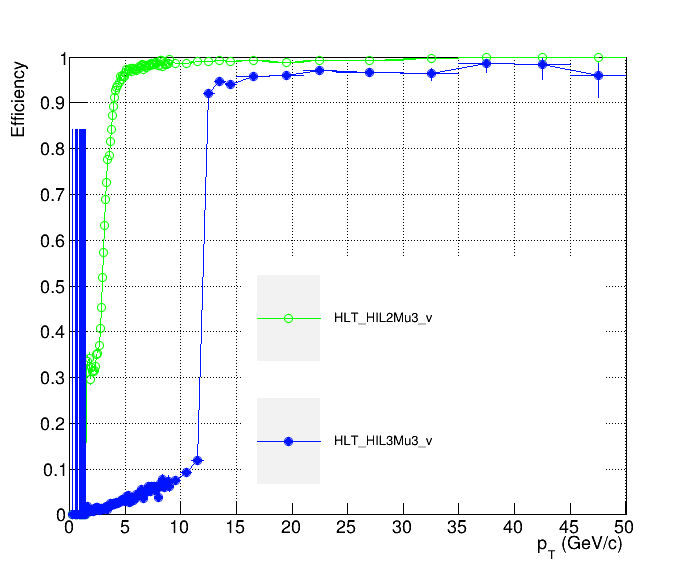

In [129]:

leg.SetNColumns(1)
leg.SetTextSize(0.024)
leg.SetX1(0.35);leg.SetX2(0.87);leg.SetY1(0.12);leg.SetY2(0.55);
leg.Clear()
#canv, leg = DrawTrigSeq(f_out1.Get("L1DoubleMuOpen"), 'pt', canv, _col = 221, _leg = leg, _disc = "L1DoubleMuOpen v2-6")
#canv, leg = DrawTrigSeq(f_out1.Get("L1DoubleMuZero"), 'pt', canv, _and = True, _col = 221, _leg = leg, _disc = "L1DoubleMuZero v2-6")
#canv, leg = DrawTrigSeq(f_out1.Get("L1DoubleMuSQ"), 'pt', canv, _and = True, _col = 208, _leg = leg, _disc = "L1DoubleMu SQ v2-6")

# canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL1Mu0_v"), 'pt', canv, _and = False, _col = getcolor(0), _leg = leg, _marker = 24, _disc = "HLT_HIL1Mu0_v")# %s" % ver1)# v2-7-mod1")
canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL2SingleMu3_Open_v"), 'pt', canv, _and = False, _col = getcolor(10), _leg = leg, _marker = 24, _disc = "HLT_HIL2Mu3_v")# %s" % ver1)# v2-7-mod1")
canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL3SingleMu12_Open_v"), 'pt', canv, _and = True, _col = getcolor(20), _leg = leg, _marker = 20, _disc = "HLT_HIL3Mu3_v")# %s" % ver1)# v2-7-mod1")


# canv, leg = DrawTrigSeq(f_leg.Get("HLT_HIL1DoubleMuOpen_v"), 'pt', canv, _and = True, _col = 2, _leg = leg, _disc = "HLT_HIL1DoubleMu0_Legacy_v")
leg.DrawClone()
canv.Draw()
canv.SaveAs("%s/Eff_pt_RateCut_Comp_Simu_%s.pdf" % (pltdir, ver) )
canv.SaveAs("%s/Eff_pt_RateCut_Comp_Simu_%s.png" % (pltdir, ver) )
leg.Clear()

In [ ]:

leg.SetNColumns(1)
leg.SetTextSize(0.024)
leg.SetX1(0.35);leg.SetX2(0.87);leg.SetY1(0.12);leg.SetY2(0.55);
leg.Clear()
#canv, leg = DrawTrigSeq(f_out1.Get("L1DoubleMuOpen"), 'pt', canv, _col = 221, _leg = leg, _disc = "L1DoubleMuOpen v2-6")
#canv, leg = DrawTrigSeq(f_out1.Get("L1DoubleMuZero"), 'pt', canv, _and = True, _col = 221, _leg = leg, _disc = "L1DoubleMuZero v2-6")
#canv, leg = DrawTrigSeq(f_out1.Get("L1DoubleMuSQ"), 'pt', canv, _and = True, _col = 208, _leg = leg, _disc = "L1DoubleMu SQ v2-6")

canv, leg = DrawTrigSeq(f_out2.Get("L2DoubleMuOpen_DoHLTCut_Mass"), 'pt', canv, _and = False, _col = getcolor(0), _leg = leg, _marker = 24, _disc = "L2DoubleMuOpen")# %s" % ver1)# v2-7-mod1")
canv, leg = DrawTrigSeq(f_out2.Get("L3DoubleMuOpen_DoHLTCut_Mass"), 'pt', canv, _and = True, _col = getcolor(1), _leg = leg, _marker = 24, _disc = "L3DoubleMuOpen")# %s" % ver1)# v2-7-mod1")
canv, leg = DrawTrigSeq(f_out2.Get("L2DoubleMuOpen_DoHLTCut_Mass"), 'pt_4p0', canv, _and = True, _col = getcolor(2), _leg = leg, _marker = 20, _disc = "L2DoubleMu Open pt > 4")# %s" % ver1)# v2-7-mod1")
canv, leg = DrawTrigSeq(f_out2.Get("L3DoubleMuOpen_DoHLTCut_Mass"), 'pt_3p4', canv, _and = True, _col = getcolor(3), _leg = leg, _marker = 20, _disc = "L3DoubleMu Open pt > 3.4")# %s" % ver1)# v2-7-mod1")

canv, leg = DrawTrigSeq(f_out2.Get("L2DoubleMuZer_DoHLTCut_Mass"), 'pt', canv, _and = True, _col = getcolor(6), _leg = leg, _marker = 25, _disc = "L2DoubleMuZero")# %s" % ver1)# v2-7-mod1")
canv, leg = DrawTrigSeq(f_out2.Get("L3DoubleMuZero_DoHLTCut_Mass"), 'pt', canv, _and = True, _col = getcolor(8), _leg = leg, _marker = 25, _disc = "L3DoubleMuZero")# %s" % ver1)# v2-7-mod1")
canv, leg = DrawTrigSeq(f_out2.Get("L2DoubleMuZer_DoHLTCut_Mass"), 'pt_3p8', canv, _and = True, _col = getcolor(10), _leg = leg, _marker = 39,  _disc = "L2DoubleMuZero pt > 3.8")#%s" % ver1)# v2-7-mod1")
canv, leg = DrawTrigSeq(f_out2.Get("L3DoubleMuZero_DoHLTCut_Mass"), 'pt_3p1', canv, _and = True, _col = getcolor(12), _leg = leg, _marker = 21, _disc = "L3DoubleMuZero pt > 3.1")#%s" % ver1)# v2-7-mod1")

canv, leg = DrawTrigSeq(f_out2.Get("L2DoubleMuSQ_DoHLTCut_Mass"), 'pt', canv, _and = True, _col = getcolor(16), _leg = leg, _marker = 26, _disc = "L2DoubleMu SQ")# %s" % ver1)# v2-7-mod1")
canv, leg = DrawTrigSeq(f_out2.Get("L3DoubleMuSQ_DoHLTCut_Mass"), 'pt', canv, _and = True, _col = getcolor(18), _leg = leg, _marker = 26, _disc = "L3DoubleMu SQ")# %s" % ver1)# v2-7-mod1")
canv, leg = DrawTrigSeq(f_out2.Get("L2DoubleMuSQ_DoHLTCut_Mass"), 'pt_3p5', canv, _and = True, _col = getcolor(20), _leg = leg, _marker = 22, _disc = "L2DoubleMu SQ pt > 3.5")# %s" % ver1)# v2-7-mod1")
canv, leg = DrawTrigSeq(f_out2.Get("L3DoubleMuSQ_DoHLTCut_Mass"), 'pt_3p0', canv, _and = True, _col = getcolor(22), _leg = leg, _marker = 22, _disc = "L3DoubleMu SQ pt > 3")# %s" % ver1)# v2-7-mod1")

# canv, leg = DrawTrigSeq(f_leg.Get("HLT_HIL1DoubleMuOpen_v"), 'pt', canv, _and = True, _col = 2, _leg = leg, _disc = "HLT_HIL1DoubleMu0_Legacy_v")
leg.DrawClone()
canv.Draw()
canv.SaveAs("%s/Eff_pt_RateCut_Comp_hltMass_%s.pdf" % (pltdir, ver) )
canv.SaveAs("%s/Eff_pt_RateCut_Comp_hltMass_%s.png" % (pltdir, ver) )

leg.Clear()

In [ ]:

leg.SetNColumns(1)
leg.SetTextSize(0.024)
leg.SetX1(0.35);leg.SetX2(0.87);leg.SetY1(0.12);leg.SetY2(0.55);
leg.Clear()
#canv, leg = DrawTrigSeq(f_out1.Get("L1DoubleMuOpen"), 'pt', canv, _col = 221, _leg = leg, _disc = "L1DoubleMuOpen v2-6")
#canv, leg = DrawTrigSeq(f_out1.Get("L1DoubleMuZero"), 'pt', canv, _and = True, _col = 221, _leg = leg, _disc = "L1DoubleMuZero v2-6")
#canv, leg = DrawTrigSeq(f_out1.Get("L1DoubleMuSQ"), 'pt', canv, _and = True, _col = 208, _leg = leg, _disc = "L1DoubleMu SQ v2-6")
leg.SetHeader("J/Psi Only")
canv, leg = DrawTrigSeq(f_out2.Get("L2DoubleMuOpen"), 'pt', canv, _and = False, _col = getcolor(0), _leg = leg, _marker = 24, _disc = "L2DoubleMuOpen")# %s" % ver1)# v2-7-mod1")
canv, leg = DrawTrigSeq(f_out2.Get("L3DoubleMuOpen"), 'pt', canv, _and = True, _col = getcolor(1), _leg = leg, _marker = 24, _disc = "L3DoubleMuOpen")# %s" % ver1)# v2-7-mod1")
canv, leg = DrawTrigSeq(f_out2.Get("L2DoubleMuOpen_DoHLTCut_Mass"), 'pt', canv, _and = True, _col = getcolor(10), _leg = leg, _marker = 24, _disc = "L2DoubleMuOpen M 1 to 6.5")# %s" % ver1)# v2-7-mod1")
canv, leg = DrawTrigSeq(f_out2.Get("L3DoubleMuOpen_DoHLTCut_Mass"), 'pt', canv, _and = True, _col = getcolor(18), _leg = leg, _marker = 24, _disc = "L3DoubleMuOpen M 2 to 4")# %s" % ver1)# v2-7-mod1")
# canv, leg = DrawTrigSeq(f_out2.Get("L2DoubleMuOpen"), 'pt_4p0', canv, _and = True, _col = getcolor(2), _leg = leg, _marker = 20, _disc = "L2DoubleMu Open pt > 4")# %s" % ver1)# v2-7-mod1")
# canv, leg = DrawTrigSeq(f_out2.Get("L3DoubleMuOpen"), 'pt_3p4', canv, _and = True, _col = getcolor(3), _leg = leg, _marker = 20, _disc = "L3DoubleMu Open pt > 3.4")# %s" % ver1)# v2-7-mod1")
# canv, leg = DrawTrigSeq(f_out2.Get("L3DoubleMuOpen_drMax3p5_M0to7_Open"), 'pt', canv, _and = True, _col = getcolor(10), _leg = leg, _marker = 25, _disc = "L3DoubleMu M0to7 Open")# %s" % ver1)# v2-7-mod1")
# canv, leg = DrawTrigSeq(f_out2.Get("L3DoubleMuOpen_drMax3p5_M2p2to4p4_Open"), 'pt', canv, _and = True, _col = getcolor(12), _leg = leg, _marker = 29, _disc = "L3DoubleMu M2.2to4.4 Open")# %s" % ver1)# v2-7-mod1")
# canv, leg = DrawTrigSeq(f_out2.Get("L3DoubleMuOpen_drMax3p5_M2p2to4p4_Open_Vtx"), 'pt', canv, _and = True, _col = getcolor(16), _leg = leg, _marker = 31, _disc = "L3DoubleMu M2.2to4.4 Open Vtx")# %s" % ver1)# v2-7-mod1")


# canv, leg = DrawTrigSeq(f_out2.Get("L2DoubleMuZero"), 'pt', canv, _and = True, _col = getcolor(6), _leg = leg, _marker = 25, _disc = "L2DoubleMuZero")# %s" % ver1)# v2-7-mod1")
# canv, leg = DrawTrigSeq(f_out2.Get("L3DoubleMuZero"), 'pt', canv, _and = True, _col = getcolor(8), _leg = leg, _marker = 25, _disc = "L3DoubleMuZero")# %s" % ver1)# v2-7-mod1")
# canv, leg = DrawTrigSeq(f_out2.Get("L2DoubleMuZero"), 'pt_3p8', canv, _and = True, _col = getcolor(10), _leg = leg, _marker = 39,  _disc = "L2DoubleMuZero pt > 3.8")#%s" % ver1)# v2-7-mod1")
# canv, leg = DrawTrigSeq(f_out2.Get("L3DoubleMuZero"), 'pt_3p1', canv, _and = True, _col = getcolor(12), _leg = leg, _marker = 21, _disc = "L3DoubleMuZero pt > 3.1")#%s" % ver1)# v2-7-mod1")

# canv, leg = DrawTrigSeq(f_out2.Get("L2DoubleMuSQ"), 'pt', canv, _and = True, _col = getcolor(16), _leg = leg, _marker = 26, _disc = "L2DoubleMu SQ")# %s" % ver1)# v2-7-mod1")
# canv, leg = DrawTrigSeq(f_out2.Get("L3DoubleMuSQ"), 'pt', canv, _and = True, _col = getcolor(18), _leg = leg, _marker = 26, _disc = "L3DoubleMu SQ")# %s" % ver1)# v2-7-mod1")
# canv, leg = DrawTrigSeq(f_out2.Get("L2DoubleMuSQ"), 'pt_3p5', canv, _and = True, _col = getcolor(20), _leg = leg, _marker = 22, _disc = "L2DoubleMu SQ pt > 3.5")# %s" % ver1)# v2-7-mod1")
# canv, leg = DrawTrigSeq(f_out2.Get("L3DoubleMuSQ"), 'pt_3p0', canv, _and = True, _col = getcolor(22), _leg = leg, _marker = 22, _disc = "L3DoubleMu SQ pt > 3")# %s" % ver1)# v2-7-mod1")

# canv, leg = DrawTrigSeq(f_leg.Get("HLT_HIL1DoubleMuOpen_v"), 'pt', canv, _and = True, _col = 2, _leg = leg, _disc = "HLT_HIL1DoubleMu0_Legacy_v")
leg.DrawClone()
canv.Draw()
canv.SaveAs("%s/Eff_pt_RateCut_Comp2_%s.pdf" % (pltdir, ver) )
leg.Clear()

In [ ]:
leg.Clear()
leg.SetX1(0.52);leg.SetX2(0.87);leg.SetY1(0.12);leg.SetY2(0.35); tg = "L2DoubleMuOpen"
canv, leg = DrawTrigPTSeq(f_out2.Get( tg ), canv,  _leg = leg, _header = tg ,  _pallet = getcolor)
canv.SaveAs("Eff_%s/Eff_pTSpectrum_%s.pdf" % (ver1, tg) )

leg.Clear()
leg.SetX1(0.52);leg.SetX2(0.87);leg.SetY1(0.12);leg.SetY2(0.35); tg = "L2DoubleMuZero"
canv, leg = DrawTrigPTSeq(f_out2.Get( tg ), canv,  _leg = leg, _header = tg ,  _pallet = getcolor)
canv.SaveAs("Eff_%s/Eff_pTSpectrum_%s.pdf" % (ver1, tg) )

leg.Clear()
leg.SetX1(0.52);leg.SetX2(0.87);leg.SetY1(0.12);leg.SetY2(0.35); tg = "L2DoubleMuSQ"
canv, leg = DrawTrigPTSeq(f_out2.Get( tg ), canv,  _leg = leg, _header = tg ,  _pallet = getcolor)
canv.SaveAs("Eff_%s/Eff_pTSpectrum_%s.pdf" % (ver1, tg) )

leg.Clear()
leg.SetX1(0.52);leg.SetX2(0.87);leg.SetY1(0.12);leg.SetY2(0.35); tg = "L3DoubleMuOpen"
canv, leg = DrawTrigPTSeq(f_out2.Get( tg ), canv,  _leg = leg, _header = tg ,  _pallet = getcolor)
canv.SaveAs("Eff_%s/Eff_pTSpectrum_%s.pdf" % (ver1, tg) )

leg.Clear()
leg.SetX1(0.52);leg.SetX2(0.87);leg.SetY1(0.12);leg.SetY2(0.35); tg = "L3DoubleMuOpen_drMax3p5_M0to7_Open"
canv, leg = DrawTrigPTSeq(f_out2.Get( tg ), canv,  _leg = leg, _header = tg ,  _pallet = getcolor)
canv.SaveAs("Eff_%s/Eff_pTSpectrum_%s.pdf" % (ver1, tg) )

leg.Clear()
leg.SetX1(0.52);leg.SetX2(0.87);leg.SetY1(0.12);leg.SetY2(0.35); tg = "L3DoubleMuZero"
canv, leg = DrawTrigPTSeq(f_out2.Get( tg ), canv,  _leg = leg, _header = tg ,  _pallet = getcolor)
canv.SaveAs("Eff_%s/Eff_pTSpectrum_%s.pdf" % (ver1, tg) )

leg.Clear()
leg.SetX1(0.52);leg.SetX2(0.87);leg.SetY1(0.12);leg.SetY2(0.35); tg = "L3DoubleMuSQ"
canv, leg = DrawTrigPTSeq(f_out2.Get( tg ), canv,  _leg = leg, _header = tg ,  _pallet = getcolor)
canv.SaveAs("Eff_%s/Eff_pTSpectrum_%s.pdf" % (ver1, tg) )


In [ ]:
leg.SetX1(0.52);leg.SetX2(0.87);leg.SetY1(0.12);leg.SetY2(0.35); tg = "L2DoubleMuZero"
ROOT.gSystem.mkdir("Eff_%s/Spktrm/%s" % (ver1, tg) )
for ix in range (len(x)):
    leg.Clear()
    canv, leg = DrawTrigPTSeq(f_out2.Get( tg ), canv,  _leg = leg, _header = tg ,  _pallet = getcolorOne, _paux = ix)
    canv.SaveAs("Eff_%s/Spktrm/%s/Eff_pTSpectrum_%d_%s.png" % (ver1, tg, ix, tg) )
getGif(tg)

leg.SetX1(0.52);leg.SetX2(0.87);leg.SetY1(0.12);leg.SetY2(0.35); tg = "L2DoubleMuOpen"
ROOT.gSystem.mkdir("Eff_%s/Spktrm/%s" % (ver1, tg) )
for ix in range (len(x)):
    leg.Clear()
    canv, leg = DrawTrigPTSeq(f_out2.Get( tg ), canv,  _leg = leg, _header = tg ,  _pallet = getcolorOne, _paux = ix)
    canv.SaveAs("Eff_%s/Spktrm/%s/Eff_pTSpectrum_%d_%s.png" % (ver1, tg, ix, tg) )
getGif(tg)
    
leg.SetX1(0.52);leg.SetX2(0.87);leg.SetY1(0.12);leg.SetY2(0.35); tg = "L2DoubleMuSQ"
ROOT.gSystem.mkdir("Eff_%s/Spktrm/%s" % (ver1, tg) )
for ix in range (len(x)):
    leg.Clear()
    canv, leg = DrawTrigPTSeq(f_out2.Get( tg ), canv,  _leg = leg, _header = tg ,  _pallet = getcolorOne, _paux = ix)
    canv.SaveAs("Eff_%s/Spktrm/%s/Eff_pTSpectrum_%d_%s.png" % (ver1, tg, ix, tg) )
getGif(tg)


leg.SetX1(0.52);leg.SetX2(0.87);leg.SetY1(0.12);leg.SetY2(0.35); tg = "L3DoubleMuZero"
ROOT.gSystem.mkdir("Eff_%s/Spktrm/%s" % (ver1, tg) )
for ix in range (len(x)):
    leg.Clear()
    canv, leg = DrawTrigPTSeq(f_out2.Get( tg ), canv,  _leg = leg, _header = tg ,  _pallet = getcolorOne, _paux = ix)
    canv.SaveAs("Eff_%s/Spktrm/%s/Eff_pTSpectrum_%d_%s.png" % (ver1, tg, ix, tg) )
getGif(tg)

leg.SetX1(0.52);leg.SetX2(0.87);leg.SetY1(0.12);leg.SetY2(0.35); tg = "L3DoubleMuOpen"
ROOT.gSystem.mkdir("Eff_%s/Spktrm/%s" % (ver1, tg) )
for ix in range (len(x)):
    leg.Clear()
    canv, leg = DrawTrigPTSeq(f_out2.Get( tg ), canv,  _leg = leg, _header = tg ,  _pallet = getcolorOne, _paux = ix)
    canv.SaveAs("Eff_%s/Spktrm/%s/Eff_pTSpectrum_%d_%s.png" % (ver1, tg, ix, tg) )
getGif(tg)

leg.SetX1(0.52);leg.SetX2(0.87);leg.SetY1(0.12);leg.SetY2(0.35); tg = "L3DoubleMuOpen_drMax3p5_M0to7_Open"
ROOT.gSystem.mkdir("Eff_%s/Spktrm/%s" % (ver1, tg) )
for ix in range (len(x)):
    leg.Clear()
    canv, leg = DrawTrigPTSeq(f_out2.Get( tg ), canv,  _leg = leg, _header = tg ,  _pallet = getcolorOne, _paux = ix)
    canv.SaveAs("Eff_%s/Spktrm/%s/Eff_pTSpectrum_%d_%s.png" % (ver1, tg, ix, tg) )
getGif(tg)

leg.SetX1(0.52);leg.SetX2(0.87);leg.SetY1(0.12);leg.SetY2(0.35); tg = "L3DoubleMuOpen_drMax3p5_M2p2to4p4_Open"
ROOT.gSystem.mkdir("Eff_%s/Spktrm/%s" % (ver1, tg) )
for ix in range (len(x)):
    leg.Clear()
    canv, leg = DrawTrigPTSeq(f_out2.Get( tg ), canv,  _leg = leg, _header = tg ,  _pallet = getcolorOne, _paux = ix)
    canv.SaveAs("Eff_%s/Spktrm/%s/Eff_pTSpectrum_%d_%s.png" % (ver1, tg, ix, tg) )
getGif(tg)
    
leg.SetX1(0.52);leg.SetX2(0.87);leg.SetY1(0.12);leg.SetY2(0.35); tg = "L3DoubleMuSQ"
ROOT.gSystem.mkdir("Eff_%s/Spktrm/%s" % (ver1, tg) )
for ix in range (len(x)):
    leg.Clear()
    canv, leg = DrawTrigPTSeq(f_out2.Get( tg ), canv,  _leg = leg, _header = tg ,  _pallet = getcolorOne, _paux = ix)
    canv.SaveAs("Eff_%s/Spktrm/%s/Eff_pTSpectrum_%d_%s.png" % (ver1, tg, ix, tg) )
getGif(tg)

In [ ]:
leg.SetNColumns(1)
canv, leg = DrawTrigSeq(f_out1.Get("L3DoubleMuOpen_drMax3p5_M0to7_Open"), 'pt', canv, _col = 221, _leg = leg, _disc = "L3Dimu M0~7 v2-6")

canv, leg = DrawTrigSeq(f_out2.Get("L3DoubleMuOpen_drMax3p5_M0to7_Open"), 'pt', canv, _and = True, _col = 216, _leg = leg, _disc = "L3Dimu M0~7 v2-7-mod1")

canv, leg = DrawTrigSeq(f_leg.Get("HLT_HIL3DoubleMuOpen_v"), 'pt', canv, _and = True, _col = 3, _leg = leg, _disc = "HLT_HIL3DoubleMu0_Legacy_v")
leg.SetY1(0.57);leg.SetY2(0.87);
leg.DrawClone()
leg.Clear()
canv.Draw()
canv.SaveAs("Eff_pt_L3DoubleMuOpen_Comp_MassCut_%s.pdf" % ver)

In [ ]:
leg.SetNColumns(1)
canv, leg = DrawTrigSeq(f_out1.Get("HLT_HIL3Mu0_v"), 'pt', canv, _col = 221, _leg = leg, _disc = "L3 Single Muon v2-6")

canv, leg = DrawTrigSeq(f_out2.Get("HLT_HIL3Mu0_v"), 'pt', canv, _and = True, _col = 216, _leg = leg, _disc = "L3 Single Muon v2-7-mod1")

canv, leg = DrawTrigSeq(f_leg.Get("HLT_HIL3Mu12_v"), 'pt', canv, _and = True, _col = 3, _leg = leg, _disc = "HLT_HIL3Mu12_legacy")
leg.SetY1(0.21);leg.SetY2(0.44);
leg.SetX1(0.16);leg.SetX2(0.45);

leg.DrawClone()
leg.Clear()
canv.Draw()
canv.SaveAs("Eff_pt_L3DoubleMuOpen_Comp_MassCut_%s.pdf" % ver)

In [ ]:
if f_out1.IsOpen()  : f_out1.Close()
if f_out2.IsOpen()  : f_out2.Close()
f_out1 = TFile.Open("output_Data2018_v2_6.root")
f_out2 = TFile.Open("output_Data2018_v2_7_mod1.root")

In [ ]:
ver = "v2_7_mod1"
pltdir = "Eff_JPsiHydjet_v220530"
leg.SetNColumns(1)
leg.SetTextSize(0.024)
leg.SetX1(0.12);leg.SetX2(0.67);leg.SetY1(0.12);leg.SetY2(0.35);
leg.Clear()
#canv, leg = DrawTrigSeq(f_out1.Get("L1DoubleMuOpen"), 'pt', canv, _col = 221, _leg = leg, _disc = "L1DoubleMuOpen v2-6")
#canv, leg = DrawTrigSeq(f_out1.Get("L1DoubleMuZero"), 'pt', canv, _and = True, _col = 221, _leg = leg, _disc = "L1DoubleMuZero v2-6")
#canv, leg = DrawTrigSeq(f_out1.Get("L1DoubleMuSQ"), 'pt', canv, _and = True, _col = 208, _leg = leg, _disc = "L1DoubleMu SQ v2-6")

canv, leg = DrawTrigSeq(f_out2.Get("L1DoubleMuOpen"), 'pt', canv, _and = False, _col = 216, _leg = leg, _disc = "L1DoubleMuOpen new")# v2-7-mod1")
canv, leg = DrawTrigSeq(f_out2.Get("L1DoubleMuZero"), 'pt', canv, _and = True, _col = 211, _leg = leg, _disc = "L1DoubleMuZero new")# v2-7-mod1")
canv, leg = DrawTrigSeq(f_out2.Get("L1DoubleMuSQ"), 'pt', canv, _and = True, _col = 95, _leg = leg, _disc = "L1DoubleMu SQ")# v2-7-mod1")

canv, leg = DrawTrigSeq(f_leg.Get("HLT_HIL1DoubleMuOpen_v"), 'pt', canv, _and = True, _col = 2, _leg = leg, _disc = "HLT_HIL1DoubleMu0_Legacy_v")
leg.DrawClone()
canv.Draw()
canv.SaveAs("%s/Eff_pt_L1DoubleMuOpen_Comp_%s.pdf" % (pltdir, ver) )
leg.Clear()

# canv, leg = DrawTrigSeq(f_out1.Get("L2DoubleMuOpen"), 'pt', canv, _col = 221, _leg = leg, _disc = "L2DoubleMuOpen v2-6")
# canv, leg = DrawTrigSeq(f_out1.Get("L2DoubleMuZero"), 'pt', canv, _and = True, _col = 221, _leg = leg, _disc = "L2DoubleMuZero v2-6")
# canv, leg = DrawTrigSeq(f_out1.Get("L2DoubleMuSQ"), 'pt', canv, _and = True, _col = 208, _leg = leg, _disc = "L2DoubleMu SQ v2-6")

canv, leg = DrawTrigSeq(f_out2.Get("L2DoubleMuOpen"), 'pt', canv, _and = False, _col = 216, _leg = leg, _disc = "L2DoubleMuOpen v2-7-mod1")
canv, leg = DrawTrigSeq(f_out2.Get("L2DoubleMuZero"), 'pt', canv, _and = True, _col = 211, _leg = leg, _disc = "L2DoubleMuZero v2-7-mod1")
canv, leg = DrawTrigSeq(f_out2.Get("L2DoubleMuSQ"), 'pt', canv, _and = True, _col = 95, _leg = leg, _disc = "L2DoubleMu SQ v2-7-mod1")

canv, leg = DrawTrigSeq(f_leg.Get("HLT_HIL2DoubleMuOpen_v"), 'pt', canv, _and = True, _col = 2, _leg = leg, _disc = "HLT_HIL2DoubleMu0_Legacy_v")
leg.SetX1(0.17)
leg.SetNColumns(2)
leg.DrawClone()
canv.Draw()
canv.SaveAs("%s/Eff_pt_L2DoubleMuOpen_Comp_%s.pdf" % (pltdir, ver) )
leg.Clear()

# canv, leg = DrawTrigSeq(f_out1.Get("L3DoubleMuOpen"), 'pt', canv, _col = 221, _leg = leg, _disc = "L3DoubleMuOpen v2-6")
# canv, leg = DrawTrigSeq(f_out1.Get("L3DoubleMuZero"), 'pt', canv, _and = True, _col = 221, _leg = leg, _disc = "L3DoubleMuZero v2-6")
# canv, leg = DrawTrigSeq(f_out1.Get("L3DoubleMuSQ"), 'pt', canv, _and = True, _col = 208, _leg = leg, _disc = "L3DoubleMu SQ v2-6")

canv, leg = DrawTrigSeq(f_out2.Get("L3DoubleMuOpen"), 'pt', canv, _and = False, _col = 216, _leg = leg, _disc = "L3DoubleMuOpen v2-7-mod1")
canv, leg = DrawTrigSeq(f_out2.Get("L3DoubleMuZero"), 'pt', canv, _and = True, _col = 211, _leg = leg, _disc = "L3DoubleMuZero v2-7-mod1")
canv, leg = DrawTrigSeq(f_out2.Get("L3DoubleMuSQ"), 'pt', canv, _and = True, _col = 95, _leg = leg, _disc = "L3DoubleMu SQ v2-7-mod1")

canv, leg = DrawTrigSeq(f_leg.Get("HLT_HIL3DoubleMuOpen_v"), 'pt', canv, _and = True, _col = 2, _leg = leg, _disc = "HLT_HIL3DoubleMu0_Legacy_v")
leg.SetX1(0.12);leg.SetY1(0.62);leg.SetY2(0.89);
leg.DrawClone()
leg.Clear()
canv.Draw()
canv.SaveAs("%s/Eff_pt_L3DoubleMuOpen_Comp_%s.pdf" % (pltdir, ver) )


In [ ]:
def n( aa ,bb ):
    return aa + bb

In [ ]:
def nn( q, f = n ):
    bx = 3
    return f(bx, q)